# This Notebook's main purpose is to convert extracted data from Amazon

In [1]:
#Importing all necessary libraries to convert JSON files to CSV
import json # This line imports the library necessary to process JSON files on this notebook
import pandas as pd #This line imports the necessary library for pandas operations

## 1. Beats Pill 

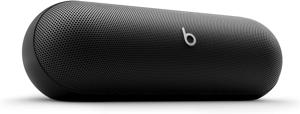

Portable Bluetooth Speaker - Up to 24H Battery Life, Water Resistant, Bluetooth, Apple & Android Compatible, Seriously Loud Sound for Home, Outdoor and Travel - Matte Black


In [2]:
# Path to the input JSON file containing Beats Pill Speaker reviews data
file_path = 'JSON_files/data_dre_pill.json'


# Open the JSON file and load its contents into a Python dictionary
with open(file_path, 'r') as file:
    data = json.load(file)

In [3]:
# Initialize a list to collect structured review data
reviews_data = []
count = 0

# Iterate over each result item in the JSON data
for result in data['results']:
    # Extract the ASIN (product identifier) from the nested content
  asin = result['content']["asin"]
    # Iterate over every review associated with this result
  for review in result['content']['reviews']:
    count += 1 # Increment a counter for processed reviews (used in exception handling)
    try:
      # Build a dictionary representing a single review with selected fields
      review_info = {
      'review_id': review['id'],
      'product_id': asin,
      "title": review["title"],
      "author": review["author"],
      "rating": review["rating"],
      "content": review["content"],
      "timestamp": review["timestamp"],
      "profile_id": review["profile_id"],
      "is_verified": review["is_verified"],
      "helpful_count": review.get('helpful_count', 0),# Use 0 if not present
      "product_attributes": review["product_attributes"]
      }
      # Append the structured review to our collection
      reviews_data.append(review_info)
    except:
      # If any error occurs while processing this review, print the count
      # and stop processing further reviews for this result
      print(count)
      break

# Convert the list of review dictionaries into a pandas DataFrame
reviews_df1 = pd.DataFrame(reviews_data)

# Save the DataFrame to a CSV file for later use
reviews_df1.to_csv('CSV_files/reviews_Beats_Pill.csv', index=False)

# Display the DataFrame in the notebook environment (optional)
reviews_df1

86
87


,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,R2SSSH04J4J264,B0D4SX9RC6,5.0 out of 5 stars Really nice portable speake...,Bruce C,5,Needed a new portable speaker for the home set...,"Reviewed in the United States July 1, 2024",AFVM53KRAU5JC462ZZDBBKTESPGA,True,18,Color: Statement RedStyle: PillPattern: Withou...
1,R935PCZ92UVGL,B0D4SX9RC6,5.0 out of 5 stars Very Happy,B. Hinson,5,We bought this for a trip to the beach and it ...,"Reviewed in the United States September 5, 2024",AFPN35SDBWBDQAGNSNQJQPQH5C2Q,True,0,Color: Champagne GoldStyle: PillPattern: Witho...
2,R4BQHA0TLLJNN,B0D4SX9RC6,5.0 out of 5 stars The best Speaker I have eve...,Leox,5,I really like the new Beats Pill 2024 speaker....,"Reviewed in the United States July 11, 2024",AEUCX7EIPTMCFN4OJBZHL2OYSVKQ,True,8,Color: Champagne GoldStyle: PillPattern: Witho...
3,R39X7USU3OX34C,B0D4SX9RC6,5.0 out of 5 stars Really good,Justin,5,So I’m super picky about sound and have spent ...,"Reviewed in the United States July 8, 2024",AFSZPNTTLYCLNP536L6VS6UMFTNQ,True,7,Color: Statement RedStyle: PillPattern: Withou...
4,R2EVRTXO9M1YF7,B0D4SX9RC6,4.0 out of 5 stars Is it the JBL killer?,Tommy,4,"I bought this because it was on sale, and I al...","Reviewed in the United States July 23, 2024",AHAMVBSECCNUJMQV6A3BO3A3HNMA,True,5,Color: Matte BlackStyle: PillPattern: Without ...
...,...,...,...,...,...,...,...,...,...,...,...
80,R16YQMK6DBJQBM,B0D4SX9RC6,"3.0 out of 5 stars Great sound, but MONO ruins...",B Lii,3,I was stoked to try a speaker from Beats with ...,"Reviewed in the United States July 12, 2024",AHPZCQ2XOKQNJY2SIWQ4FRTHHDLQ,False,0,Color: Champagne GoldStyle: PillPattern: Witho...
81,R2H42JDX6Y37E,B0D4SX9RC6,5.0 out of 5 stars Best beats pill ever !,B,5,If you’re in need of a new lightweight portabl...,"Reviewed in the United States June 30, 2024",AFNLS7O6IJVQTC4QVORI4QIHSAEA,False,1,Color: Statement RedStyle: PillPattern: Withou...
82,R3L2A88GOC5G6I,B0D4SX9RC6,5.0 out of 5 stars Good speaker,Oli Rivers,5,The media could not be loaded. For a smallish ...,"Reviewed in the United States July 1, 2024",AFZK22BJRF7EXCXKGIVXNXI2BPPA,False,6,Color: Matte BlackStyle: PillPattern: Without ...
83,R99X2DXJ9IWPM,B0D4SX9RC6,5.0 out of 5 stars Rlly good,Luis dejesus,5,The media could not be loaded. Great audio lou...,"Reviewed in the United States July 2, 2024",AGANNLHAZNLD5K6NVFMJX3X6HFEQ,False,6,Color: Statement RedStyle: PillPattern: Withou...


In [ ]:
# Output the number of rows (reviews) collected for Beats Pill
len(reviews_df1)

85

## 2. Altec Lansing

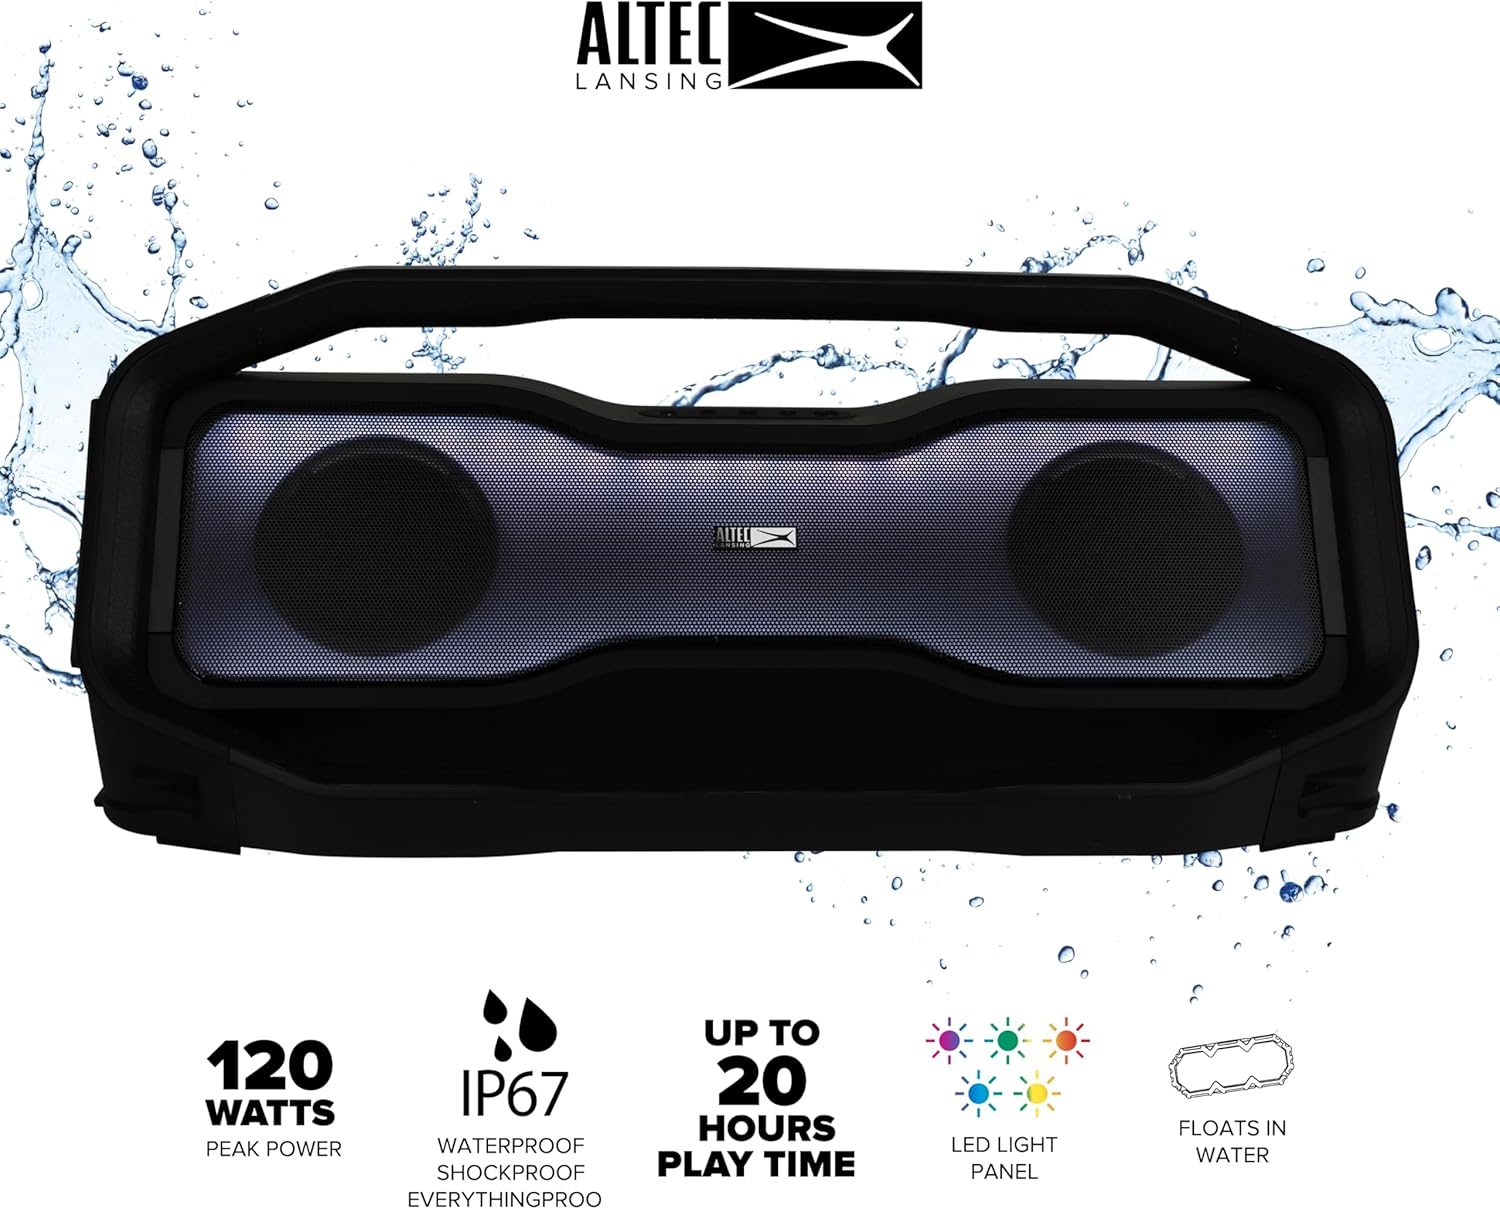

Altec Lansing Rockbox XL 2.0 Portable Bluetooth Wireless Speakers with Led Lights, IP67 Waterproof and Durable for Outdoor, 20 Hours Battery with App Control

In [4]:
# Path to the input JSON file containing Altec lansing Speaker reviews data
file_path = 'JSON_files/data_alt_lan.json'


# Open the JSON file and load its contents into a Python dictionary
with open(file_path, 'r') as file:
    data = json.load(file)


# Initialize a list to collect structured review data
reviews_data = []
count = 0

# Iterate over each result item in the JSON data
for result in data['results']:
    # Extract the ASIN (product identifier) from the nested content
  asin = result['content']["asin"]
    # Iterate over every review associated with this result
  for review in result['content']['reviews']:
    count += 1 # Increment a counter for processed reviews (used in exception handling)
    try:
      # Build a dictionary representing a single review with selected fields
      review_info = {
      'review_id': review['id'],
      'product_id': asin,
      "title": review["title"],
      "author": review["author"],
      "rating": review["rating"],
      "content": review["content"],
      "timestamp": review["timestamp"],
      "profile_id": review["profile_id"],
      "is_verified": review["is_verified"],
      "helpful_count": review.get('helpful_count', 0),# Use 0 if not present
      "product_attributes": review["product_attributes"]
      }
      # Append the structured review to our collection
      reviews_data.append(review_info)
    except:
      # If any error occurs while processing this review, print the count
      # and stop processing further reviews for this result
      print(count)
      break

# Convert the list of review dictionaries into a pandas DataFrame
reviews_df2 = pd.DataFrame(reviews_data)

# Save the DataFrame to a CSV file for later use
reviews_df2.to_csv('CSV_files/reviews_Altec_Lansing.csv', index=False)

# Display the DataFrame in the notebook environment (optional)
reviews_df2

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,R2CE7YQ1U1PC5B,B0BSNZJGTX,5.0 out of 5 stars Amazing sound,Golden,5,I absolutely love how easy this speaker is to ...,"Reviewed in the United States July 18, 2024",AE34WY4Y5NA6EUOLN2YZEC24AC3Q,True,0,Color: Black
1,R3CGXUZO4Y2ZGB,B0BSNZJGTX,5.0 out of 5 stars not worth money,Amber Dodson,5,Loud and durable,"Reviewed in the United States August 26, 2024",AF4VEP3WOPVW77QOPNKKKYBXTLXA,True,0,Color: Steel Grey
2,R1T4NZM3T3A56,B0BSNZJGTX,5.0 out of 5 stars Great portable speaker,Keller,5,"The sound quality is great, Connected great wi...","Reviewed in the United States July 11, 2024",AGXEIKEYKOHO5QZ43F64AMQGVRGQ,True,0,Color: Black
3,RSYP9O6489ZGB,B0BSNZJGTX,5.0 out of 5 stars Works great!,Michael Cruz,5,Nice and loud,"Reviewed in the United States August 22, 2024",AH2ZX3U2CYNHLNLZ52CWVVOMDYRQ,True,0,Color: Steel Grey
4,R1ATDRQMZJK73P,B0BSNZJGTX,1.0 out of 5 stars Not charging,kayzee,1,Product is not charging at all - right out of ...,"Reviewed in the United States October 16, 2023",AEWFBTJGFBWSEJGR6L7B3XOT3QHQ,True,8,Color: Steel Grey
...,...,...,...,...,...,...,...,...,...,...,...
95,R3MCBYMLNHUHYN,B0BSNZJGTX,5.0 out of 5 stars So far love it,amanda johnson,5,It's a bit bigger then I expected. But not hug...,"Reviewed in the United States June 23, 2022",AHCJYZICIVUZVHKVGZDOBILXYGKA,True,0,Color: Red
96,R3HR1QPD98LGJO,B0BSNZJGTX,5.0 out of 5 stars Better than expected,thomas,5,Works well with my Bluetooth transmitter from....,"Reviewed in the United States August 11, 2022",AEY2NDDNT7VDFKC4ZRVT3A3QZWEQ,True,1,Color: Steel Grey
97,R1PDQ9CZP0DLRS,B0BSNZJGTX,5.0 out of 5 stars Awesome sound quality,Thomas Garcia,5,"Love the sound quality , very useful tubing do...","Reviewed in the United States August 9, 2023",AE74BGHMXASF2IAW7EIYTIYEOGEA,True,0,Color: Black
98,R3410TLDJ6GLYS,B0BSNZJGTX,5.0 out of 5 stars Fantastic modern Bluetooth ...,K. Luczywo,5,This is just a fantastic Bluetooth speaker boo...,"Reviewed in the United States September 5, 2021",AHTA7EBPHV6VKF34JLQ7FGRAFH7A,True,1,Color: Steel Grey


In [18]:
# Output the number of rows (reviews) collected for Altec Lansing
len(reviews_df2)

100

## 3. Anker Soundcore

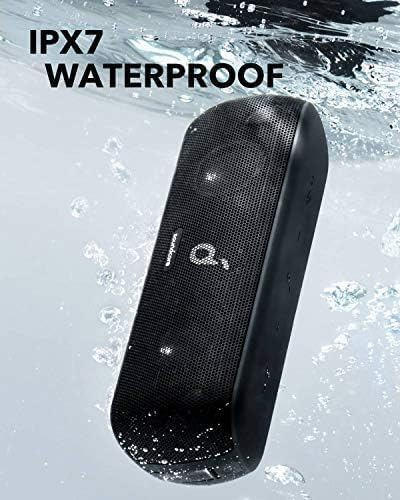


Anker Soundcore Motion+ Bluetooth Speaker with Hi-Res 30W Audio

In [5]:
# Path to the input JSON file containing Anker Soundcore Speaker reviews data
file_path = 'JSON_files/data_ank_snc.json'


# Open the JSON file and load its contents into a Python dictionary
with open(file_path, 'r') as file:
    data = json.load(file)


# Initialize a list to collect structured review data
reviews_data = []
count = 0

# Iterate over each result item in the JSON data
for result in data['results']:
    # Extract the ASIN (product identifier) from the nested content
  asin = result['content']["asin"]
    # Iterate over every review associated with this result
  for review in result['content']['reviews']:
    count += 1 # Increment a counter for processed reviews (used in exception handling)
    try:
      # Build a dictionary representing a single review with selected fields
      review_info = {
      'review_id': review['id'],
      'product_id': asin,
      "title": review["title"],
      "author": review["author"],
      "rating": review["rating"],
      "content": review["content"],
      "timestamp": review["timestamp"],
      "profile_id": review["profile_id"],
      "is_verified": review["is_verified"],
      "helpful_count": review.get('helpful_count', 0),# Use 0 if not present
      "product_attributes": review["product_attributes"]
      }
      # Append the structured review to our collection
      reviews_data.append(review_info)
    except:
      # If any error occurs while processing this review, print the count
      # and stop processing further reviews for this result
      print(count)
      break

# Convert the list of review dictionaries into a pandas DataFrame
reviews_df3 = pd.DataFrame(reviews_data)

# Save the DataFrame to a CSV file for later use
reviews_df3.to_csv('CSV_files/reviews_Ankar_Soundcore.csv', index=False)

# Display the DataFrame in the notebook environment (optional)
reviews_df3

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,R2PF2WLR41KJR6,B07P39MLKH,5.0 out of 5 stars Great for Audiophiles on a ...,Caleb Roden,5,This is the best speaker for the money out the...,"Reviewed in the United States July 5, 2024",AGVTW4JTHAFPLMM6EQNFZ5XAL6IQ,True,4,Color: Black
1,R1QXBHCR4TIS7G,B07P39MLKH,5.0 out of 5 stars Sounds very good with app/EQ,von Diesel,5,"Out of the box, the sound lacks bass and some ...","Reviewed in the United States February 19, 2024",AGHBCHZUKT423NPUVBUDNJRJUQ7Q,True,14,Color: Black
2,RP27U3MZYB2O1,B07P39MLKH,5.0 out of 5 stars Great sounding speaker from...,Alby,5,The speakers sound surprisingly good given how...,"Reviewed in the United States August 23, 2024",AG5KYWEJU5OUCUAGPUJ6TL27ILEA,True,0,Color: Black
3,R3I7YEMYIPDPT3,B07P39MLKH,"4.0 out of 5 stars Great Speaker, has some fix...",CheezyWeezle,4,"The speaker itself is very good, has a lot of ...","Reviewed in the United States April 3, 2020",AFUPIW4BXLOBZXBG7CEP235UWBFA,True,15,Color: Black
4,RSATCQM413XZR,B07P39MLKH,5.0 out of 5 stars BT connection problem : But...,Alex Y. Yoon,5,UPDATE : 10/21/2020Problem Solved. Anker/Sound...,"Reviewed in the United States October 7, 2020",AGGIR5S4YQMG4IKWU3A7K3BQ56ZA,True,4,Color: Black
...,...,...,...,...,...,...,...,...,...,...,...
95,R3V1KUTDQGYYSQ,B07P39MLKH,4.0 out of 5 stars great sound but wish it cou...,Yeezy,4,i was looking for a portable speaker that coul...,"Reviewed in the United States October 29, 2023",AEWK7ZCJQGQY3CF2Z5NATYGAKQNQ,True,0,Color: Black
96,R37HUI3EPME03Y,B07P39MLKH,"5.0 out of 5 stars Solidly built, great sound,...",Sean Mckenzie,5,"I love this thing! First off, I think it looks...","Reviewed in the United States January 25, 2022",AHQ5345MK2FWM32RKP67X3GAQW2A,True,2,Color: Black
97,R3T2WS82BPF7A3,B07P39MLKH,"4.0 out of 5 stars A larger, louder version of...",Dalton Boehm,4,I ordered this Bluetooth speaker to replace my...,"Reviewed in the United States March 17, 2023",AGDCVTOYPW4DSRPI3477OGIPO2QA,True,2,Color: Black
98,R3BQP3IYNPH8Z8,B07P39MLKH,4.0 out of 5 stars Good speaker but doesn’t st...,BAJ,4,I liked the sound of this speaker and the acco...,"Reviewed in the United States June 21, 2023",AFTJK32PAEEZB6SS2EOKX3VCSF7Q,True,0,Color: Black


In [19]:
# Output the number of rows (reviews) collected for Ankar Soundcore
len(reviews_df3)

100

## 4. Bang & Olufsen Beosound

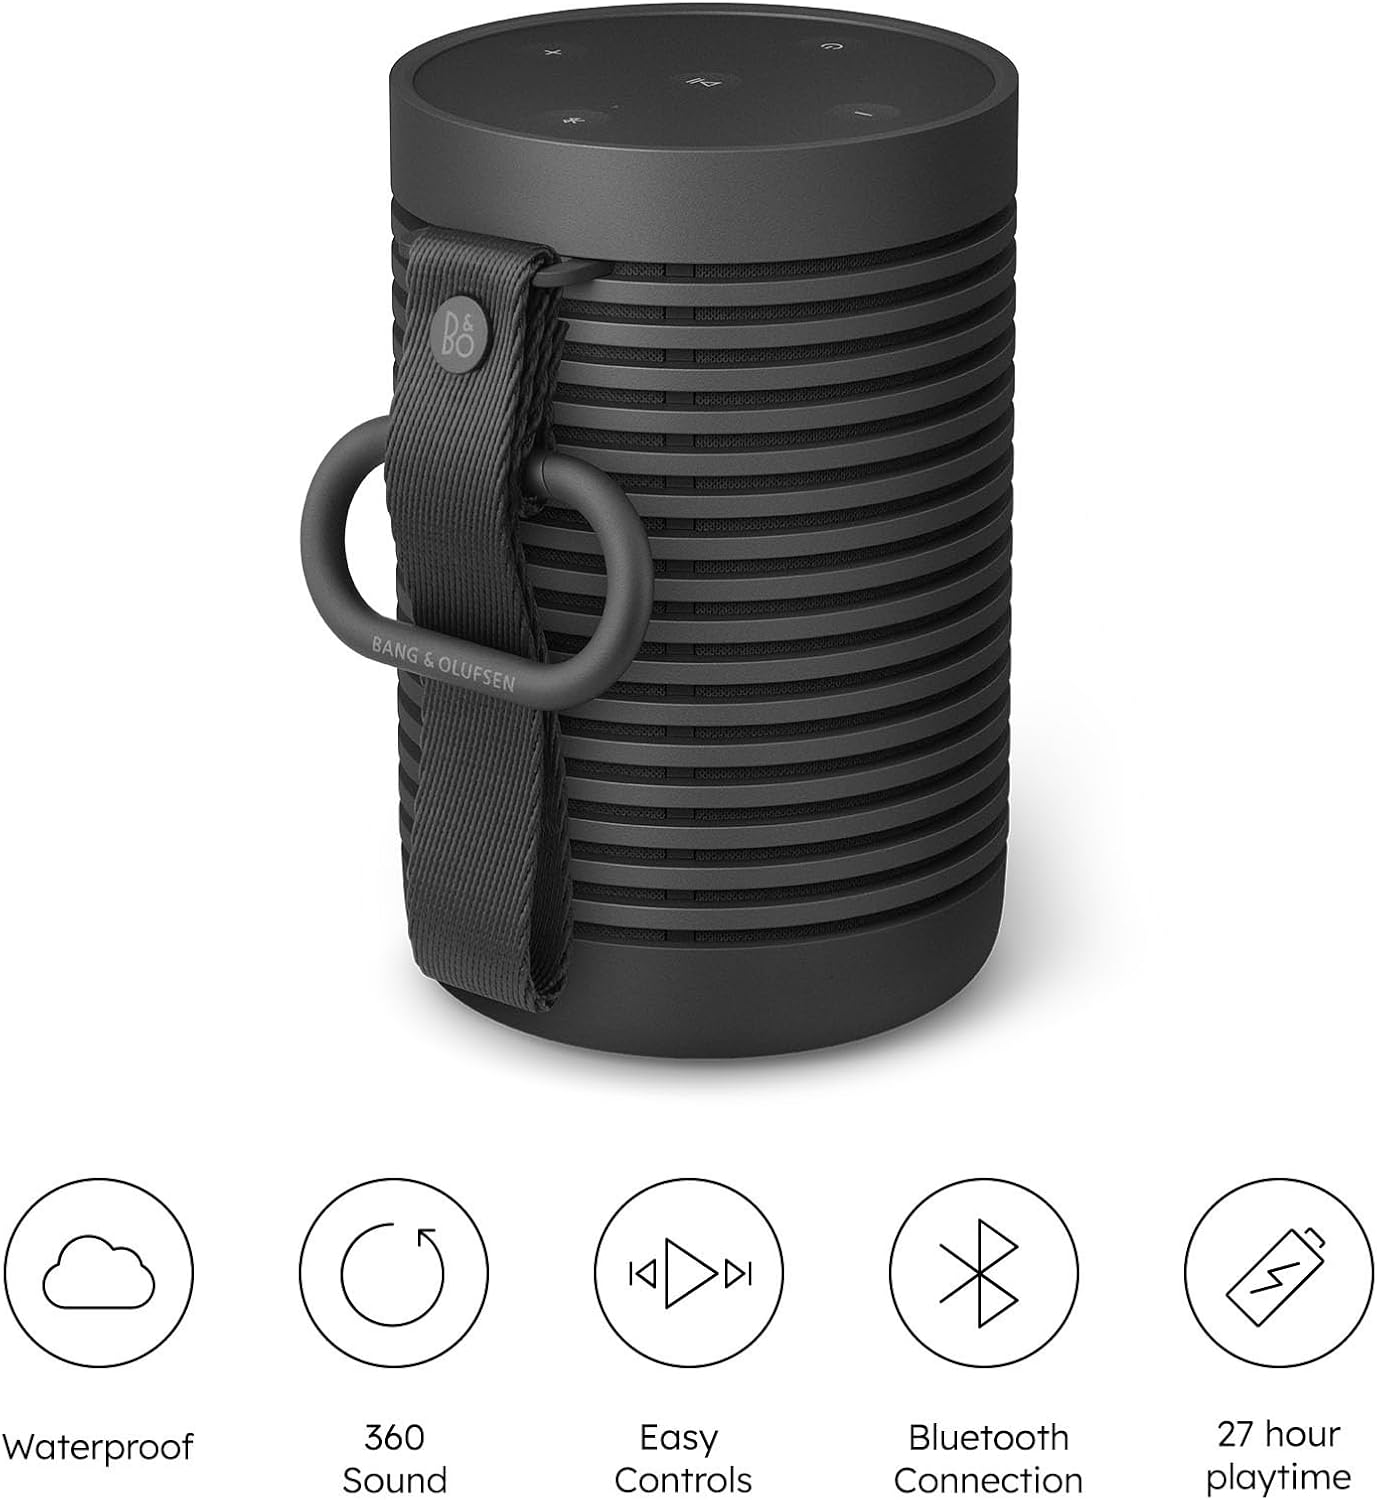

Bang & Olufsen Beosound Explore - Wireless Portable Outdoor Bluetooth Speaker, IP 67 Dustproof and Waterproof, Anthracite

In [6]:
# Path to the input JSON file containing Bang and Olufsen Beosound Speaker reviews data
file_path = 'JSON_files/data_bao_beo.json'


# Open the JSON file and load its contents into a Python dictionary
with open(file_path, 'r') as file:
    data = json.load(file)


# Initialize a list to collect structured review data
reviews_data = []
count = 0

# Iterate over each result item in the JSON data
for result in data['results']:
    # Extract the ASIN (product identifier) from the nested content
  asin = result['content']["asin"]
    # Iterate over every review associated with this result
  for review in result['content']['reviews']:
    count += 1 # Increment a counter for processed reviews (used in exception handling)
    try:
      # Build a dictionary representing a single review with selected fields
      review_info = {
      'review_id': review['id'],
      'product_id': asin,
      "title": review["title"],
      "author": review["author"],
      "rating": review["rating"],
      "content": review["content"],
      "timestamp": review["timestamp"],
      "profile_id": review["profile_id"],
      "is_verified": review["is_verified"],
      "helpful_count": review.get('helpful_count', 0),# Use 0 if not present
      "product_attributes": review["product_attributes"]
      }
      # Append the structured review to our collection
      reviews_data.append(review_info)
    except:
      # If any error occurs while processing this review, print the count
      # and stop processing further reviews for this result
      print(count)
      break

# Convert the list of review dictionaries into a pandas DataFrame
reviews_df4 = pd.DataFrame(reviews_data)

# Save the DataFrame to a CSV file for later use
reviews_df4.to_csv('CSV_files/reviews_Bang&Olufsen_Beosound.csv', index=False)

# Display the DataFrame in the notebook environment (optional)
reviews_df4

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,R1KTX4USE1JN2Y,B08YRT9T38,"5.0 out of 5 stars Beautiful Sound, Beautiful ...",Ethan Barbee,5,This is the third different B&O speaker I've b...,"Reviewed in the United States September 2, 2024",AEOMNSFUKAOLDVBX7HYX64VEXTEQ,True,0,Color: NavyStyle: Bluetooth speaker
1,R2HAQUWSTPUU1B,B08YRT9T38,"5.0 out of 5 stars Great sound, compact, very ...",Bridget Brooks,5,I typically goes to Bose speakers as my first ...,"Reviewed in the United States July 22, 2024",AEK6OWCPNNGR5I2IFKONWQBWN5GQ,True,1,Color: NavyStyle: Bluetooth speaker
2,R2OXTERJCBYAF0,B08YRT9T38,"5.0 out of 5 stars Nice little speaker, sweet ...",P. Mumford,5,I bought this to take into my backyard in the ...,"Reviewed in the United States July 27, 2024",AEQ34ZA5DNYEPTKOIOMUUUKHPUWQ,True,2,Color: Grey MistStyle: Bluetooth speaker
3,R2N9LGOT33J14T,B08YRT9T38,4.0 out of 5 stars A Posh Music speaker!,RT - Gadget Guy,4,B&O makes posh high end audio gear….gear which...,"Reviewed in the United States March 3, 2024",AE6TVTGGPRUEMJMSIV5SX6NDA2PA,True,7,Color: NavyStyle: Bluetooth speaker
4,R2X7LV4K100RNI,B08YRT9T38,5.0 out of 5 stars Natural true sounding speaker.,hubbabubba66,5,Sound quality is very good. The app provides p...,"Reviewed in the United States June 24, 2024",AGDYLA7QS2TXWBTITQ2OMV7XNSQQ,True,4,Color: Black AnthraciteStyle: Bluetooth speaker
...,...,...,...,...,...,...,...,...,...,...,...
95,R24MZVY8NWBDVZ,B08YRT9T38,4.0 out of 5 stars Good overall purchase,AL,4,Really clear sound the cost was kind of high,"Reviewed in the United States March 29, 2023",AH7JOTOQOVSJ4MDMCSLZYKKKDY4Q,True,4,Color: Black AnthraciteStyle: Bluetooth speaker
96,R2NVY9YVV7OUW1,B08YRT9T38,4.0 out of 5 stars Perfect but it is ONLY for ...,A Movie Lover,4,just good but I regret that this has only Blu ...,"Reviewed in the United States February 15, 2023",AHMT2OKP574BDRERI6NLORVMJ3GQ,True,3,Color: GreenStyle: Bluetooth speaker
97,R294OX4BKJ31UN,B08YRT9T38,2.0 out of 5 stars Doesn't sound like a Bang &...,Emmett S.,2,The look and feel of this product is amazing. ...,"Reviewed in the United States December 12, 2021",AH2VJDXKCCDJ5GII6YQ6HEGZH4ZA,True,2,Color: Black AnthraciteStyle: Bluetooth speaker
98,R389ZVLO50FRQ9,B08YRT9T38,5.0 out of 5 stars Buen sonido,Amazon Customer,5,Exelente producto,"Reviewed in the United States October 28, 2023",AFRKECRZIPIHMNXCDYEWCMOGSETQ,True,1,Color: Black AnthraciteStyle: Bluetooth speaker


In [20]:
# Output the number of rows (reviews) collected for Bang & Olufsen
len(reviews_df4)

100

## 5. Bose SoundLink Flex

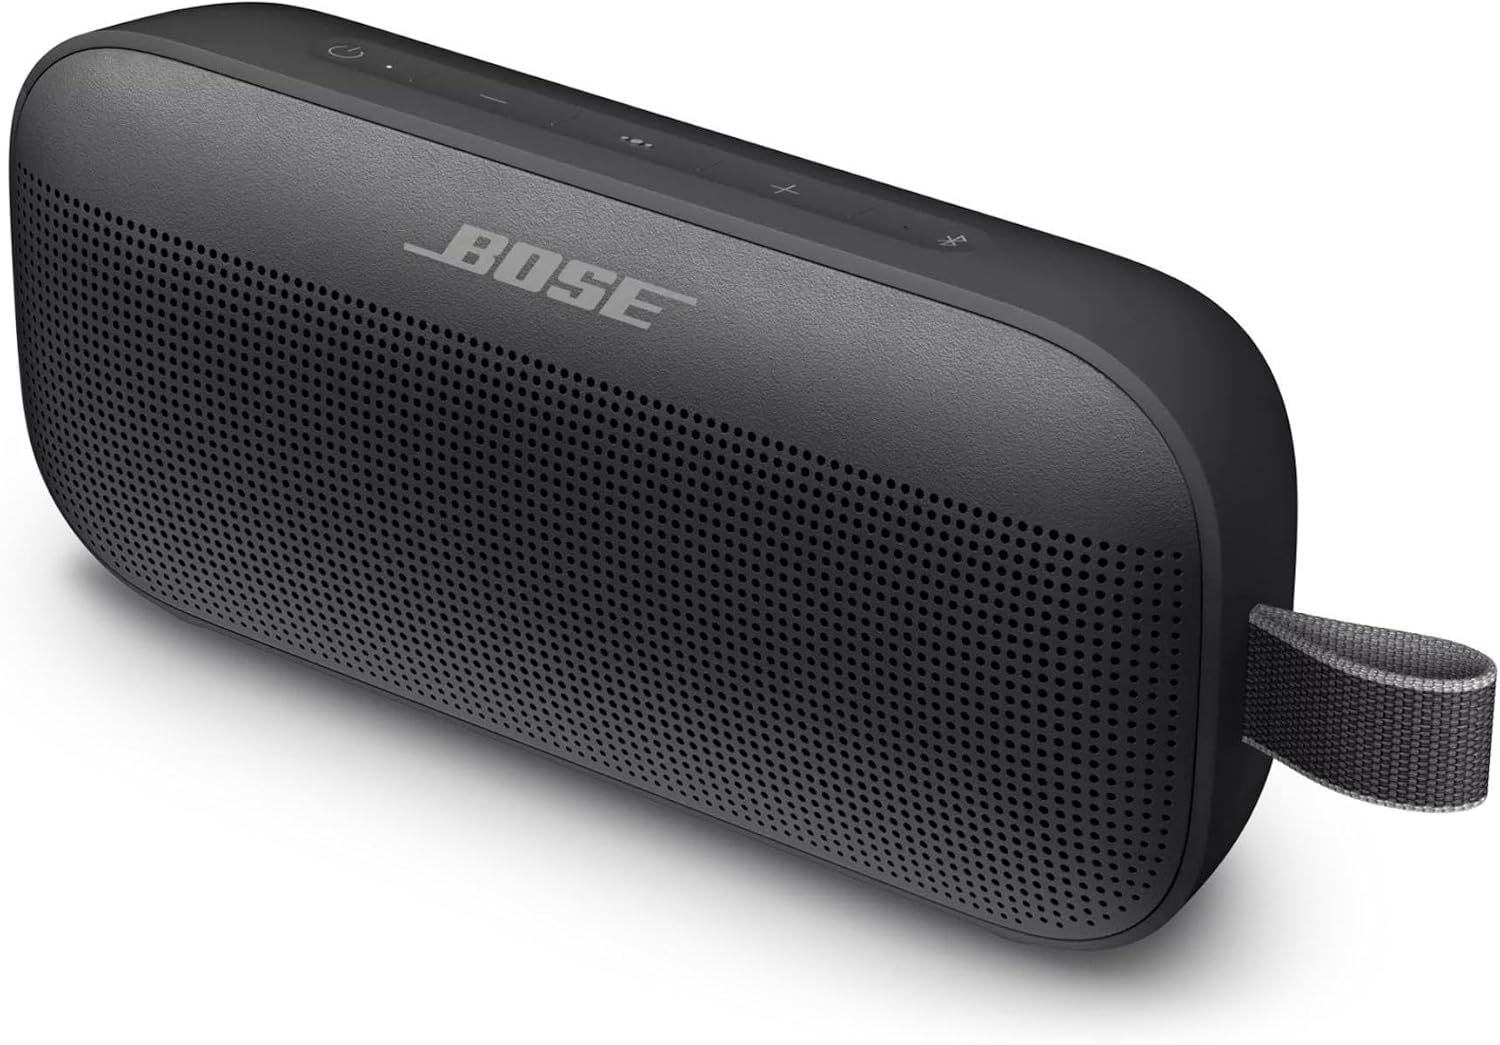

Bose SoundLink Flex Bluetooth Speaker, Portable Speaker with Microphone, Wireless Waterproof Speaker for Travel, Outdoor and Pool Use, Black


In [7]:
# Path to the input JSON file containing Bose Soundlink Flex Speaker reviews data
file_path = 'JSON_files/data_bos_slf.json'


# Open the JSON file and load its contents into a Python dictionary
with open(file_path, 'r') as file:
    data = json.load(file)


# Initialize a list to collect structured review data
reviews_data = []
count = 0

# Iterate over each result item in the JSON data
for result in data['results']:
    # Extract the ASIN (product identifier) from the nested content
  asin = result['content']["asin"]
    # Iterate over every review associated with this result
  for review in result['content']['reviews']:
    count += 1 # Increment a counter for processed reviews (used in exception handling)
    try:
      # Build a dictionary representing a single review with selected fields
      review_info = {
      'review_id': review['id'],
      'product_id': asin,
      "title": review["title"],
      "author": review["author"],
      "rating": review["rating"],
      "content": review["content"],
      "timestamp": review["timestamp"],
      "profile_id": review["profile_id"],
      "is_verified": review["is_verified"],
      "helpful_count": review.get('helpful_count', 0),# Use 0 if not present
      "product_attributes": review["product_attributes"]
      }
      # Append the structured review to our collection
      reviews_data.append(review_info)
    except:
      # If any error occurs while processing this review, print the count
      # and stop processing further reviews for this result
      print(count)
      break

# Convert the list of review dictionaries into a pandas DataFrame
reviews_df5 = pd.DataFrame(reviews_data)

# Save the DataFrame to a CSV file for later use
reviews_df5.to_csv('CSV_files/reviews_Bose_SoundLink_Flex.csv', index=False)

# Display the DataFrame in the notebook environment (optional)
reviews_df5

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,R1VLF39D9VE7FP,B099TJGJ91,5.0 out of 5 stars Clear sound and portable,Pia Sareen,5,I'm absolutely loving my new Bose SoundLink Fl...,"Reviewed in the United States August 25, 2024",AFJ5257WTRMSPHS5NSC2CVRXIJVA,True,3,Color: Stone Blue
1,R178SB5RANHLM7,B099TJGJ91,"5.0 out of 5 stars Big Sound, Easy Connection,...",Jalapeño 023,5,I’ve had this speaker for about six weeks and ...,"Reviewed in the United States August 23, 2024",AF5LQJHZHDXWVQRLZQPO2FWKSBMQ,True,1,Color: Stone Blue
2,R2LQYVEK3JWJW2,B099TJGJ91,5.0 out of 5 stars Great clear and powerful sp...,LilliesofTruth,5,"The sound quality is absolutely exceptional, d...","Reviewed in the United States July 31, 2024",AGER2OA4FJUBXTG4D47RSLLBPTMA,True,14,Color: White Smoke
3,R3T58CJGN9U85E,B099TJGJ91,5.0 out of 5 stars This is the ONE!,Bryan A. Currie,5,I had a sonos that crashed out. Wanted to repl...,"Reviewed in the United States August 9, 2024",AFGN4GW4C2QMSKXB576QGKU4VPSQ,True,6,Color: Black
4,R2TB41OYEQ665X,B099TJGJ91,5.0 out of 5 stars Simply great.,Jake,5,I have thoroughly enjoyed my entire ownership ...,"Reviewed in the United States May 4, 2024",AHZBIFMKWWZHILYEIYOSP4AIA37Q,True,255,Color: Black
5,R3ROA7AIPUTWTJ,B099TJGJ91,5.0 out of 5 stars Superior Sound Quality in a...,Brandon,5,The Bose Soundlink Flex Bluetooth Portable Spe...,"Reviewed in the United States August 7, 2024",AFQ2RJJY4FMBW4LFKJTH4YCBL25Q,True,9,Color: Stone Blue
6,R3N5UYTNS8D2V6,B099TJGJ91,"4.0 out of 5 stars Small speaker, big sound, t...",jonathan lopez,4,Got this lil thing for Prime Day for only $99....,"Reviewed in the United States July 18, 2024",AF35A3ETTRWH62AWEWFQ2GO27VJA,True,26,Color: Cypress Green
7,R2Y3WBHYS3U0M4,B099TJGJ91,5.0 out of 5 stars A premium speaker in a stur...,Reviewer MHM 3-5,5,I bought this speaker because I wanted a way t...,"Reviewed in the United States July 2, 2024",AH5F7QHDE5VKRAMBN43A5WPU4ADQ,True,121,Color: Black
8,RTTQUD9NY9L3G,B099TJGJ91,5.0 out of 5 stars Way better than expected!,Rich,5,The last time I tried Bose speakers was about ...,"Reviewed in the United States September 3, 2024",AHWOBQMLF2N4Z4TCEPMHAL4ASVHQ,True,0,Color: White Smoke
9,R3TVEXDLBORXWI,B099TJGJ91,5.0 out of 5 stars 5 Million Stars!! ⭐⭐⭐⭐⭐,Caitriona Gillespie,5,OMG this is the best speaker which is not a hu...,"Reviewed in the United States June 15, 2024",AGKOCRUHY2FG2ZHWTZRUH5JYIFBA,True,26,Color: Chilled Lilac


In [21]:
# Output the number of rows (reviews) collected for Bose SoundLink
len(reviews_df5)

10

## 6. DOSS SoundBox Plus Bluetooth Speaker

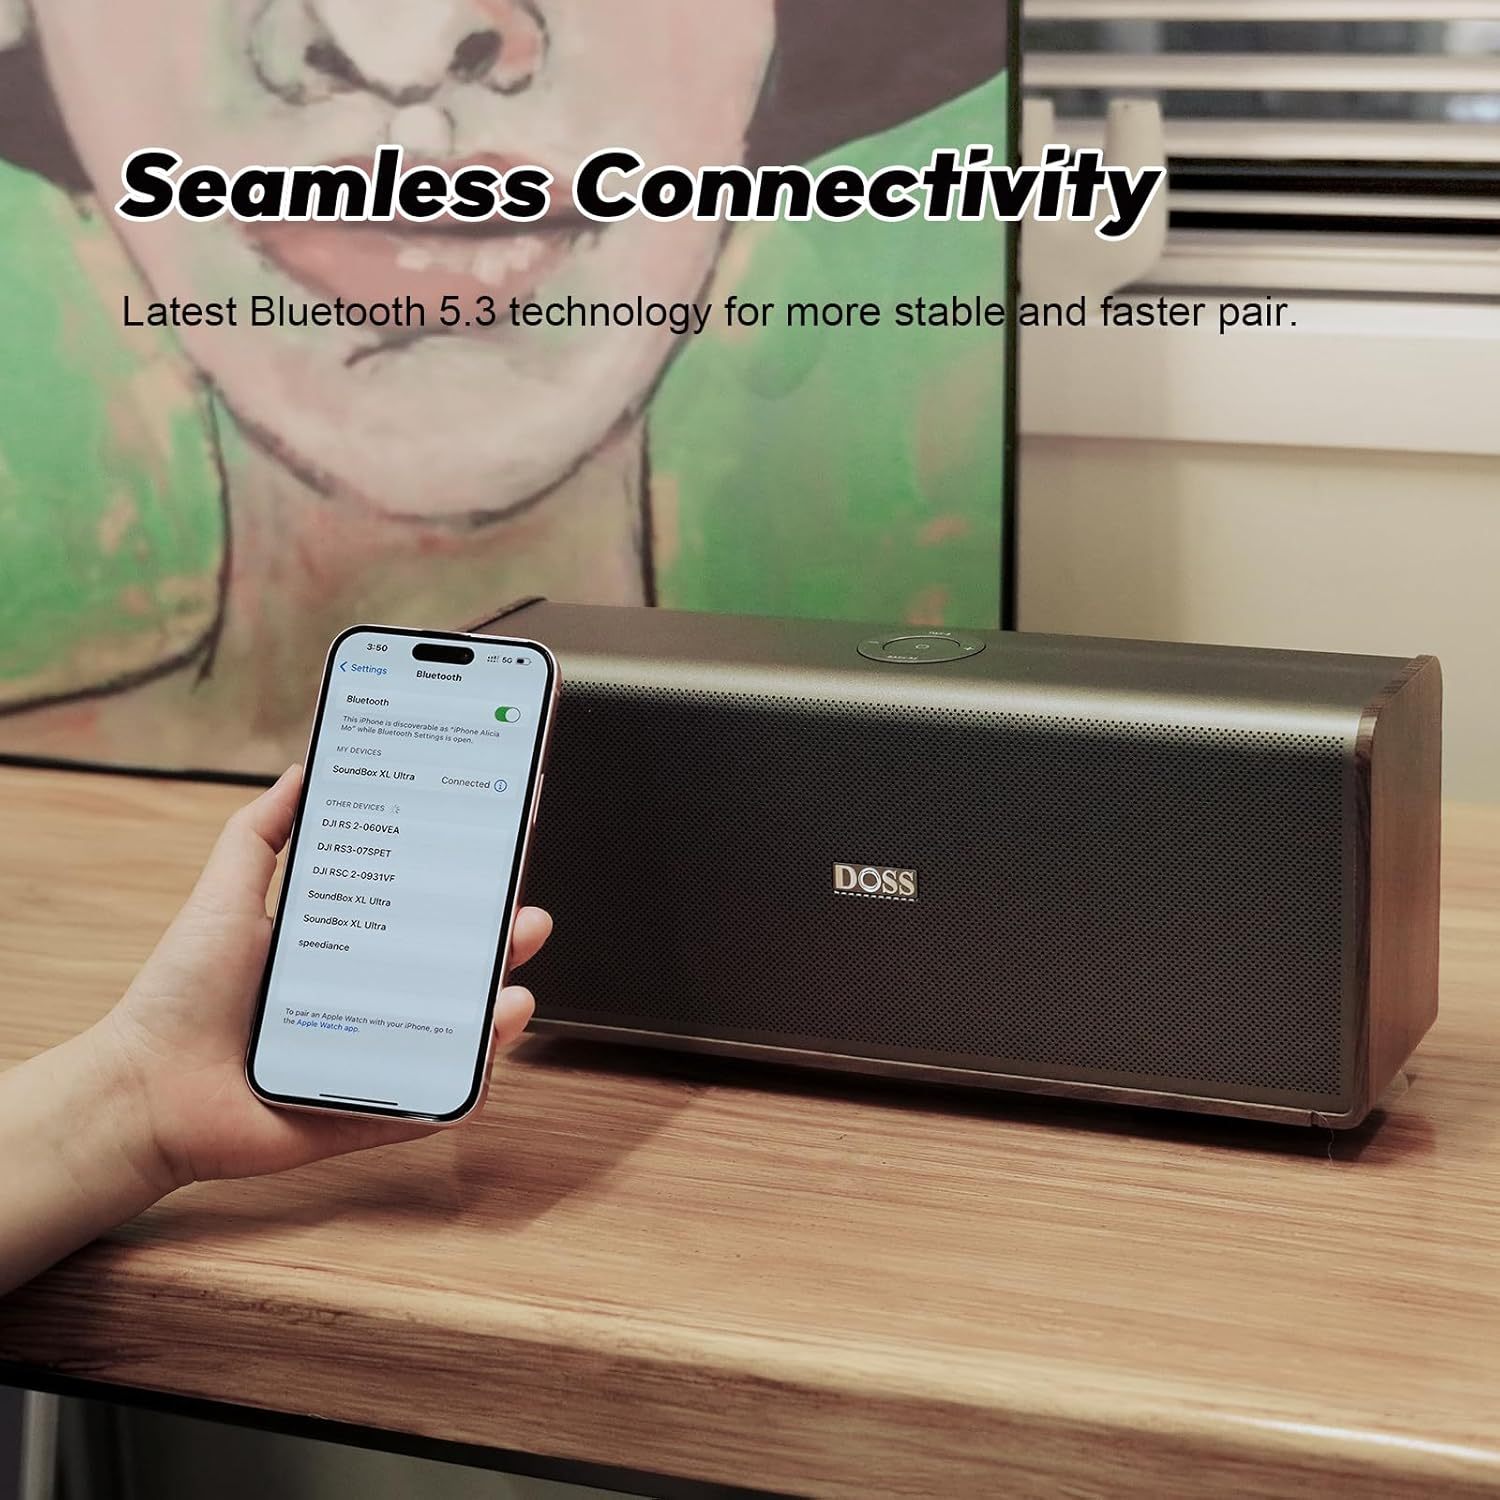

DOSS SoundBox Ultra Bluetooth Speaker with 2.1 Channel Audio, 80W Superior Sound with Deep Bass, 18H Playtime, Sleek Design-Top White Elephant, Christmas & Birthday Gift for Men, Women, Parents-Grey

In [ ]:
# Path to the input JSON file containing DOSS SoundBox Ultra Speaker reviews data
file_path = 'JSON_files/data_doss_snd.json'


# Open the JSON file and load its contents into a Python dictionary
with open(file_path, 'r') as file:
    data = json.load(file)


# Initialize a list to collect structured review data
reviews_data = []
count = 0

# Iterate over each result item in the JSON data
for result in data['results']:
    # Extract the ASIN (product identifier) from the nested content
  asin = result['content']["asin"]
    # Iterate over every review associated with this result
  for review in result['content']['reviews']:
    count += 1 # Increment a counter for processed reviews (used in exception handling)
    try:
      # Build a dictionary representing a single review with selected fields
      review_info = {
      'review_id': review['id'],
      'product_id': asin,
      "title": review["title"],
      "author": review["author"],
      "rating": review["rating"],
      "content": review["content"],
      "timestamp": review["timestamp"],
      "profile_id": review["profile_id"],
      "is_verified": review["is_verified"],
      "helpful_count": review.get('helpful_count', 0),# Use 0 if not present
      "product_attributes": review["product_attributes"]
      }
      # Append the structured review to our collection
      reviews_data.append(review_info)
    except:
      # If any error occurs while processing this review, print the count
      # and stop processing further reviews for this result
      print(count)
      break

# Convert the list of review dictionaries into a pandas DataFrame
reviews_df6 = pd.DataFrame(reviews_data)

# Save the DataFrame to a CSV file for later use
reviews_df6.to_csv('CSV_files/reviews_Doss_SoundBox_Ultra.csv', index=False)

# Display the DataFrame in the notebook environment (optional)
reviews_df6

86
87


,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,R2DYCMS5TB4LC1,B0CP7YLJ21,"5.0 out of 5 stars Exceptional sound, reasonab...",David West,5,I live fulltime in my rv at the moment with my...,"Reviewed in the United States August 23, 2024",AESN6B3TSPTOX3JSU3YURR5AIV6Q,True,2,Color: Gray
1,R2FK67G9YUSSMW,B0CP7YLJ21,5.0 out of 5 stars This is THE MacBook Speaker!,Wilbourg,5,Sets up in seconds. Sound fills the room. Huge...,"Reviewed in the United States July 28, 2024",AFW273P2VYEC5S52HJBYGYRAUE4Q,True,1,Color: Black
2,RGY6PMS85XQJ6,B0CP7YLJ21,4.0 out of 5 stars Best bluetooth speaker!,T. Blake,4,I have had this speaker for a month now. What ...,"Reviewed in the United States August 27, 2024",AHZMHVJYDHA4YMFYDO4WJTTATLAQ,True,1,Color: Gray
3,R355HOGI1SUU4O,B0CP7YLJ21,5.0 out of 5 stars Blue tooth easily picked up...,B,5,Pros: Easy to connect. Battery life is to be s...,"Reviewed in the United States August 11, 2024",AH2RZZXFW2UCUGCWTZMDYFMBFZUA,True,0,Color: Black
4,R3E8MBK1KJ7D5B,B0CP7YLJ21,5.0 out of 5 stars Very loud if you need it & ...,Jason Raub,5,I got one on sale & it's pretty nice for a blu...,"Reviewed in the United States April 2, 2024",AH4QFGDUBRCCHURNY5S2Z62EOZXQ,True,10,Color: Gray
...,...,...,...,...,...,...,...,...,...,...,...
80,R2YER5RV04CZ74,B0CP7YLJ21,5.0 out of 5 stars I want to give this TEN STARS,Howard Abraham,5,The media could not be loaded. I had no idea a...,"Reviewed in the United States March 15, 2024",AF7AXIIL5CI7A6OLJMMNMCTJCDTA,False,15,Color: Gray
81,RBPITYT3BLGJD,B0CP7YLJ21,5.0 out of 5 stars Rich Sound,Tone,5,The media could not be loaded. This soundbox u...,"Reviewed in the United States February 29, 2024",AHHGJIR6Z37OS7DSS32WGAB7KY3Q,False,3,Color: Gold
82,R2175Z1F3RWMDA,B0CP7YLJ21,5.0 out of 5 stars Speaker,Veldatheresa,5,Studio quality sound! The bass sounds impeccab...,"Reviewed in the United States March 5, 2024",AEJU3Z6HDAERETMYI2CXBQVPPDFA,False,0,Color: Black
83,R3JO8WCN3AOUR3,B0CP7YLJ21,5.0 out of 5 stars What an amazing sounding sp...,JAMES VANDERSCHAAF,5,The media could not be loaded. The speaker loo...,"Reviewed in the United States March 10, 2024",AGL4QCERHNPCLTHTCSBGQ4WROZXA,False,0,Color: Gray


In [22]:
# Output the number of rows (reviews) collected for DOSS SoundBox Ultra
len(reviews_df6)

85

## 7. JBL Charge 5 Portable Bluetooth Speaker

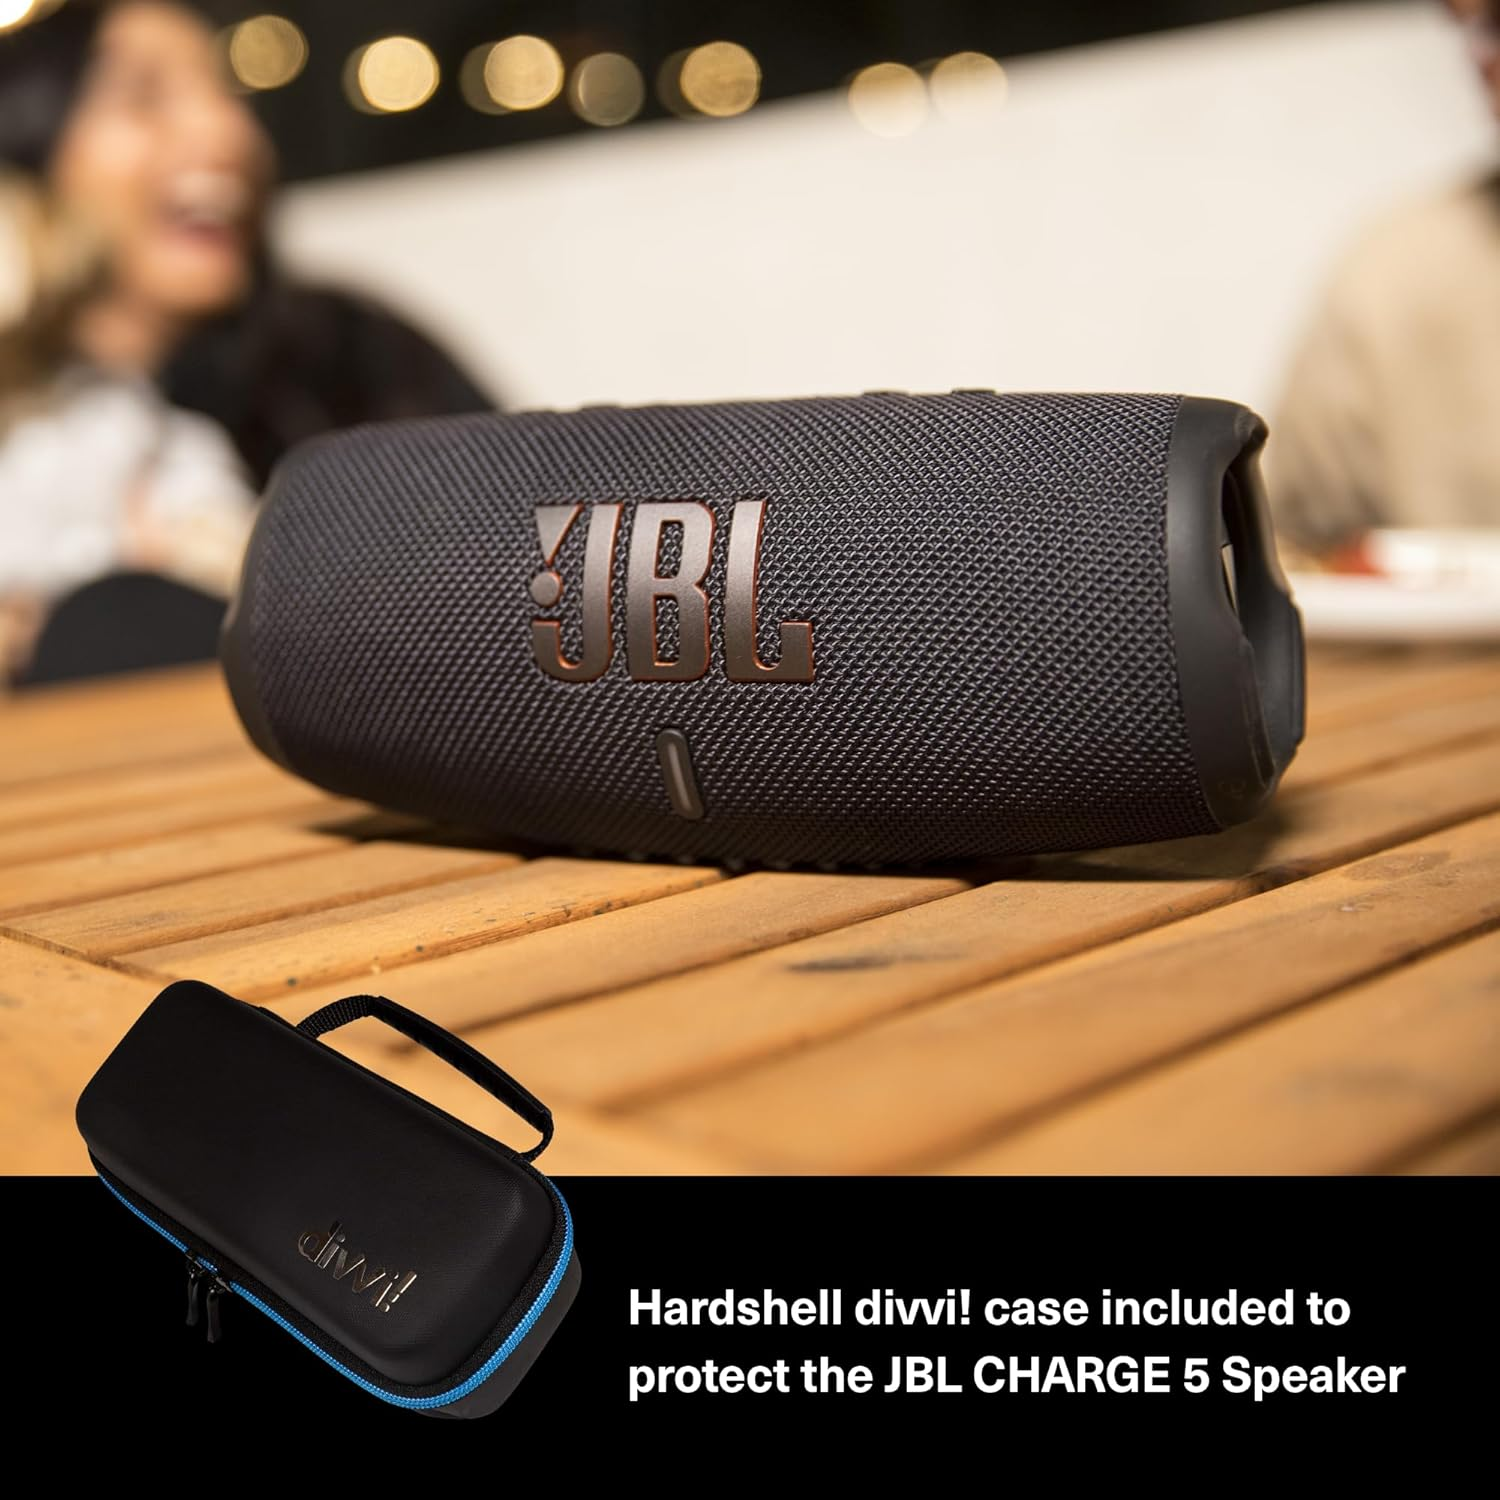

JBL Charge 5 (Teal) + Bundle with divvi! Protective Hardshell Case (Black)

In [24]:
# Path to the input JSON file containing JBL Charge 5 Speaker reviews data
file_path = 'JSON_files/data_jbl_ch5.json'


# Open the JSON file and load its contents into a Python dictionary
with open(file_path, 'r') as file:
    data = json.load(file)


# Initialize a list to collect structured review data
reviews_data = []
count = 0

# Iterate over each result item in the JSON data
for result in data['results']:
    # Extract the ASIN (product identifier) from the nested content
  asin = result['content']["asin"]
    # Iterate over every review associated with this result
  for review in result['content']['reviews']:
    count += 1 # Increment a counter for processed reviews (used in exception handling)
    try:
      # Build a dictionary representing a single review with selected fields
      review_info = {
      'review_id': review['id'],
      'product_id': asin,
      "title": review["title"],
      "author": review["author"],
      "rating": review["rating"],
      "content": review["content"],
      "timestamp": review["timestamp"],
      "profile_id": review["profile_id"],
      "is_verified": review["is_verified"],
      "helpful_count": review.get('helpful_count', 0),# Use 0 if not present
      "product_attributes": review["product_attributes"]
      }
      # Append the structured review to our collection
      reviews_data.append(review_info)
    except:
      # If any error occurs while processing this review, print the count
      # and stop processing further reviews for this result
      print(count)
      break

# Convert the list of review dictionaries into a pandas DataFrame
reviews_df7 = pd.DataFrame(reviews_data)

# Save the DataFrame to a CSV file for later use
reviews_df7.to_csv('CSV_files/reviews_JBL_Charge5.csv', index=False)

# Display the DataFrame in the notebook environment (optional)
reviews_df7

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,RHC5QKJ27NN19,B08ZNXW53L,5.0 out of 5 stars Gold standard of Bluetooth ...,bobby smith,5,The best bang for your buck Bluetooth speaker ...,"Reviewed in the United States October 9, 2023",AFCP2GGO7ZLOEYFBX65OCZOZPNCA,True,2,Style: Charge 5 + Divvi CaseColor: Squad
1,R92OHDD2YZASG,B08ZNXW53L,5.0 out of 5 stars I’m impressed,Dennis McElroy,5,I bought this with a singular purpose in mind....,"Reviewed in the United States June 3, 2024",AEATKEP5TB7K6D2KMVVJSPEV5BXQ,True,1,Style: Charge 5 + Divvi CaseColor: Blue
2,R3BTRPKJ5NXHYM,B08ZNXW53L,5.0 out of 5 stars JBL doesn't disappoint,Chuck,5,I have several JBL speakers. I really like my ...,"Reviewed in the United States April 8, 2024",AF7OKDKQDO2NUQFJTQT5YFK27QEA,True,1,Style: Charge 5 + Divvi CaseColor: Black
3,R2VJXH9A9PMD41,B08ZNXW53L,5.0 out of 5 stars A Sound Investment!,Michael T. Barefoot,5,Easy speakers to setup and they sound great too!,"Reviewed in the United States August 19, 2024",AEZD3EGYBQZCSV2SQZOTJWHIU5FA,True,0,Style: Charge 5 + Divvi CaseColor: Blue
4,R2BYWC28YP6CD8,B08ZNXW53L,5.0 out of 5 stars Juicy Bloated Lemonade,Deth,5,Look I couldn't think of a good title...This l...,"Reviewed in the United States June 14, 2021",AE7N2ACQHBB3J4PPIM7D3DXGRKXQ,True,26,Style: Charge 5 + Divvi CaseColor: Blue
...,...,...,...,...,...,...,...,...,...,...,...
95,R1M9TD2S29XWB8,B08ZNXW53L,5.0 out of 5 stars Incredible sound,Jessica,5,Another great JBL product,"Reviewed in the United States August 29, 2023",AHMXYN3TITMEQUSSSLG7INJTEB4Q,True,0,Style: Charge 5 + Divvi CaseColor: Squad
96,R384NK4W3KLHNU,B08ZNXW53L,5.0 out of 5 stars The best bluetooth speaker ...,Calcan Marius Cristian,5,"I bought this for 100$, few days ago....So ups...","Reviewed in the United States March 8, 2023",AGU6YCMD4M7RYMAYWMJP3CXFU4EA,True,1,Style: Charge 5 + Divvi CaseColor: Black
97,R12X23YV1IBTLA,B08ZNXW53L,4.0 out of 5 stars Battery life not great,William Golden,4,I have this product in JBL Charge 3 version an...,"Reviewed in the United States September 18, 2022",AGJPELWDS6LBYBWMJ6Q5MI6ADKMQ,True,1,Style: Charge 5 + Divvi CaseColor: Black
98,R3LAGH7E8DW6XP,B08ZNXW53L,4.0 out of 5 stars Sound quality and battery a...,Climbing357,4,Sound quality and battery are amazing . I comp...,"Reviewed in the United States July 31, 2021",AGITV4PNZF2XWGBH3QS74KBJR5JQ,True,0,Style: Charge 5 + Divvi CaseColor: Black


In [23]:
# Output the number of rows (reviews) collected for JBL Charge 5
len(reviews_df7)

100

## 8. Marshall Emberton II Portable Bluetooth Speaker, Black & Brass

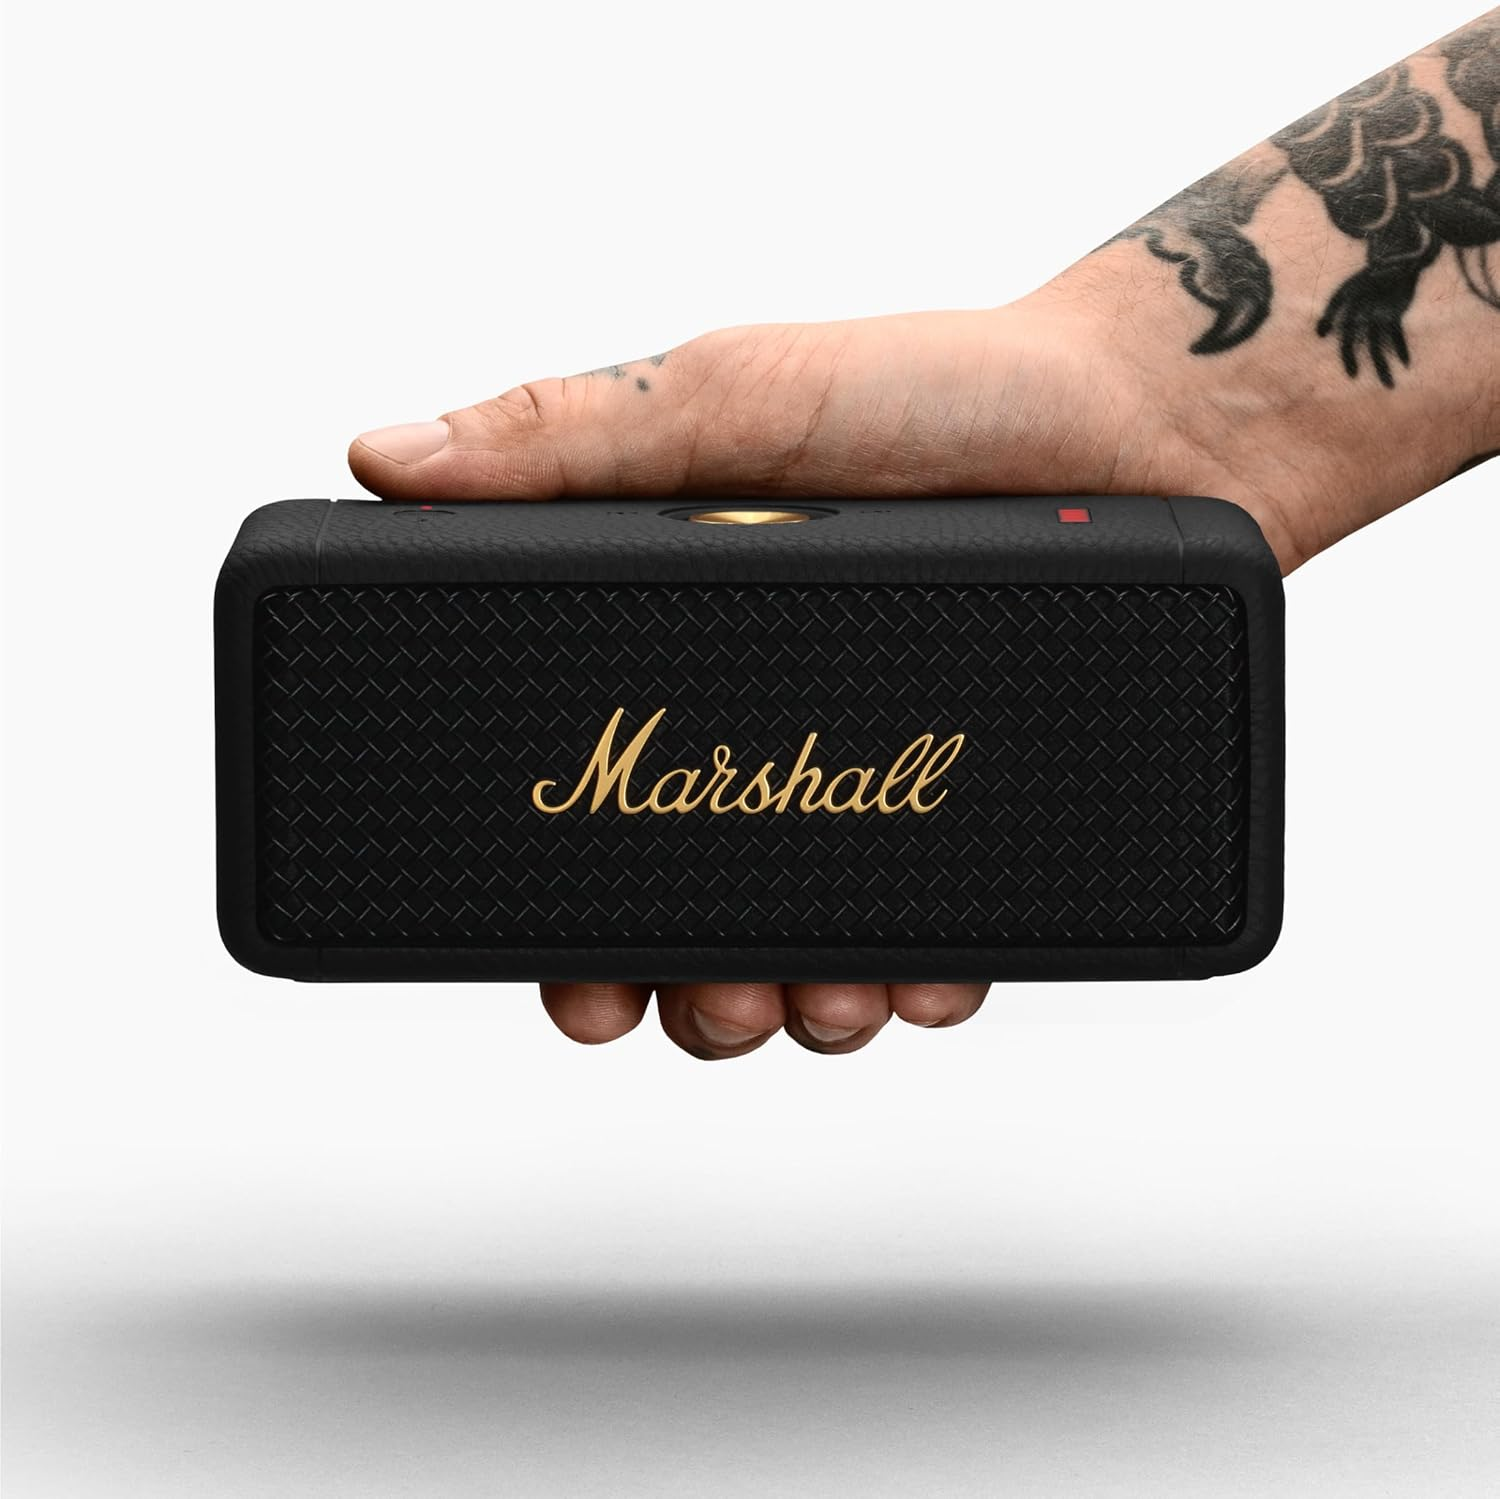

Marshall Emberton II Portable Bluetooth Speaker, Black & Brass

In [36]:
# Path to the input JSON file containing Marshall Emberton II Speaker reviews data
file_path = 'JSON_files/data_mar_emb.json'


# Open the JSON file and load its contents into a Python dictionary
with open(file_path, 'r') as file:
    data = json.load(file)


# Initialize a list to collect structured review data
reviews_data = []
count = 0

# Iterate over each result item in the JSON data
for result in data['results']:
    # Extract the ASIN (product identifier) from the nested content
  asin = result['content']["asin"]
    # Iterate over every review associated with this result
  for review in result['content']['reviews']:
    count += 1 # Increment a counter for processed reviews (used in exception handling)
    try:
      # Build a dictionary representing a single review with selected fields
      review_info = {
      'review_id': review['id'],
      'product_id': asin,
      "title": review["title"],
      "author": review["author"],
      "rating": review["rating"],
      "content": review["content"],
      "timestamp": review["timestamp"],
      "profile_id": review["profile_id"],
      "is_verified": review["is_verified"],
      "helpful_count": review.get('helpful_count', 0),# Use 0 if not present
      "product_attributes": review["product_attributes"]
      }
      # Append the structured review to our collection
      reviews_data.append(review_info)
    except:
      # If any error occurs while processing this review, print the count
      # and stop processing further reviews for this result
      print(count)
      break

# Convert the list of review dictionaries into a pandas DataFrame
reviews_df8 = pd.DataFrame(reviews_data)

# Save the DataFrame to a CSV file for later use
reviews_df8.to_csv('CSV_files/reviews_Marshall_Emberton2.csv', index=False)

# Display the DataFrame in the notebook environment (optional)
reviews_df8

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,RE2FG9LL12TYG,B09XXW54QG,5.0 out of 5 stars Excellent Design and Sound ...,luis miguel,5,"It has a beautiful design, great sound quality...","Reviewed in the United States September 2, 2024",AGSAYIKP322VJ2ZB6TQHHKIW2HHQ,True,0,Color: Black & BrassStyle: Emberton II
1,R3FWRRRYNT93BO,B09XXW54QG,5.0 out of 5 stars Great speaker,Crowman,5,Bought this speaker at a discount on Amazon fr...,"Reviewed in the United States July 25, 2024",AEL4RXU6RAHMMBA2XO3RSGXRYZYQ,True,3,Color: BlackStyle: Emberton
2,RL16ZWDRDNUEI,B09XXW54QG,5.0 out of 5 stars Great product with usage ca...,Omar Enrique Ferrer,5,A few months ago I had an epiphany. When I was...,"Reviewed in the United States October 1, 2022",AEFUDKDNGZTOEP2BCFB4CLUELCYQ,True,168,Color: Black & BrassStyle: Emberton II
3,R1WRMQNY9KE109,B09XXW54QG,5.0 out of 5 stars Simple yet Wonderful,Sunny,5,The Marshall Emberton is a testament to Marsha...,"Reviewed in the United States October 14, 2023",AEB5JEKNO3NNDOMDWCOKF2H3WDJA,True,24,Color: BlackStyle: Emberton
4,R1PKWJ1ZABTB2S,B09XXW54QG,"5.0 out of 5 stars Love, love, love, and love...",Su Doki,5,"So good, I bought two instead of one Marshall ...","Reviewed in the United States March 29, 2023",AFG3MMBXL5ODHUR3EXHWYGOHLNXA,True,22,Color: Black & BrassStyle: Emberton II
...,...,...,...,...,...,...,...,...,...,...,...
95,R2S6BSHORE15PN,B09XXW54QG,5.0 out of 5 stars Change the settings,Kennedy,5,This is a great speaker. It has speakers on bo...,"Reviewed in the United States May 22, 2024",AGYHAY6XZXOBCEQVBEOKFW5P43AQ,True,1,Color: Black & BrassStyle: Emberton II
96,R3EZH9NT28ZTNZ,B09XXW54QG,4.0 out of 5 stars It will be better if it has...,msa1906,4,It will be better if it has a 3.5mm as well.,"Reviewed in the United States May 6, 2024",AGLJIBSQCQSDN2TD4JKJ26ZKDM6A,True,0,Color: BlackStyle: Emberton
97,R1B04W9LW6SVNP,B09XXW54QG,3.0 out of 5 stars Love it but it doesn't love...,Michele,3,"Android users, just say no. The sound is very ...","Reviewed in the United States June 18, 2024",AEZNRFDHGOAASFMLKAKXZMN6ZXDA,True,2,Color: Black & BrassStyle: Emberton II
98,RMRLGM7D7ACAT,B09XXW54QG,4.0 out of 5 stars It’s great!,Elke,4,The only con is that although my phone is hook...,"Reviewed in the United States April 6, 2024",AH2IP7DXKCNR2OEXKRQUFJT5626A,True,0,Color: BlackStyle: Emberton


In [37]:
# Output the number of rows (reviews) collected for Marshall Emberton II
len(reviews_df8)

100

## 9. Sony SRS-XB33 Extra Bass Bluetooth Speaker 

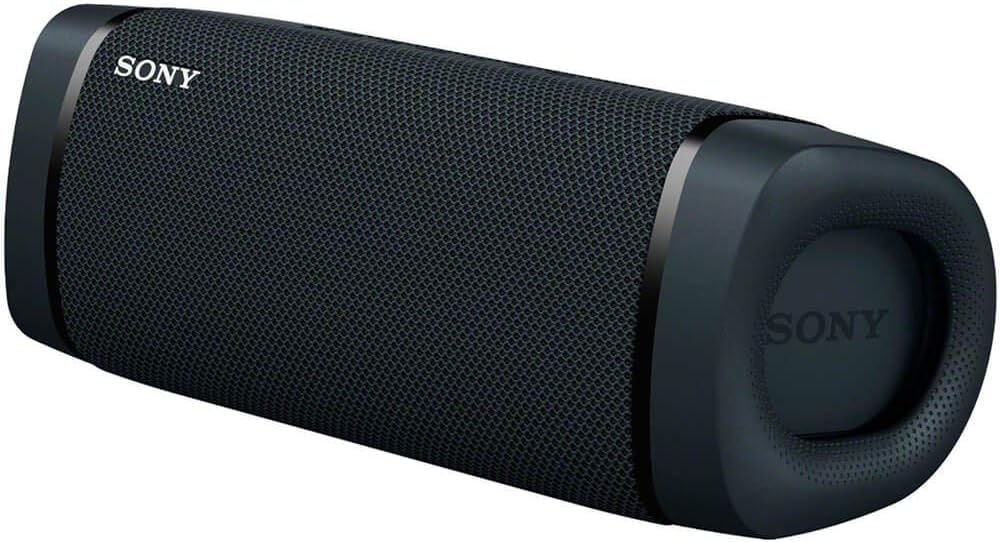

Sony SRS-XB33 EXTRA BASS Wireless Bluetooth Portable Speaker, IP67 Waterproof & Durable for Home, Outdoor, and Travel, 24 Hour Battery, Party Lights, USB Type-C, and Speakerphone, Black

In [38]:
# Path to the input JSON file containing Sony SRS-XB33 Extra Bass Bluetooth Speaker reviews data
file_path = 'JSON_files/data_sony_srs.json'


# Open the JSON file and load its contents into a Python dictionary
with open(file_path, 'r') as file:
    data = json.load(file)


# Initialize a list to collect structured review data
reviews_data = []
count = 0

# Iterate over each result item in the JSON data
for result in data['results']:
    # Extract the ASIN (product identifier) from the nested content
  asin = result['content']["asin"]
    # Iterate over every review associated with this result
  for review in result['content']['reviews']:
    count += 1 # Increment a counter for processed reviews (used in exception handling)
    try:
      # Build a dictionary representing a single review with selected fields
      review_info = {
      'review_id': review['id'],
      'product_id': asin,
      "title": review["title"],
      "author": review["author"],
      "rating": review["rating"],
      "content": review["content"],
      "timestamp": review["timestamp"],
      "profile_id": review["profile_id"],
      "is_verified": review["is_verified"],
      "helpful_count": review.get('helpful_count', 0),# Use 0 if not present
      "product_attributes": review["product_attributes"]
      }
      # Append the structured review to our collection
      reviews_data.append(review_info)
    except:
      # If any error occurs while processing this review, print the count
      # and stop processing further reviews for this result
      print(count)
      break

# Convert the list of review dictionaries into a pandas DataFrame
reviews_df9 = pd.DataFrame(reviews_data)

# Save the DataFrame to a CSV file for later use
reviews_df9.to_csv('CSV_files/reviews_Sony_SRS-XB33.csv', index=False)

# Display the DataFrame in the notebook environment (optional)
reviews_df9

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,R36E6CRFVVROEG,B086D4JNGM,5.0 out of 5 stars SRS-XB33 vs Charge 4 (and a...,Allan R,5,So I've been looking for my do-it-all BT speak...,"Reviewed in the United States July 9, 2020",AE337MXGVFISTCBIEDVVWGUFS2IQ,True,123,Color: Blue
1,ROBFW4PP7372P,B086D4JNGM,5.0 out of 5 stars 2 Years Later…FAVORITE Port...,IC,5,This thing is a BEAST - you’re definitely payi...,"Reviewed in the United States April 28, 2024",AEE3BWRTWIAESXDQKDRWNSLKF7SQ,True,2,Color: Black
2,R362ZP81YD83WL,B086D4JNGM,5.0 out of 5 stars Performs as Expected,Dave in VA,5,Very good sound quality for a small portable s...,"Reviewed in the United States November 6, 2021",AGTPLWFF7BBIYTFEPFINH6VCANJA,True,1,Color: Black
3,RT4S0NBB1JFT6,B086D4JNGM,4.0 out of 5 stars Wow! Very slept on!,G-$,4,Usually I'd buy personal audio from a manufact...,"Reviewed in the United States July 8, 2021",AHPEAYDD3GXEYQWAQT5VWMLSVMQA,True,3,Color: Black
4,R20RX5L3XO0XZW,B086D4JNGM,5.0 out of 5 stars Good Sound Decent Value. Mi...,JMR,5,I don't like the fact I can not pair this with...,"Reviewed in the United States February 10, 2021",AEOSAPIV4Z4GO7I5K3W7A7MLESMQ,True,4,Color: Black
...,...,...,...,...,...,...,...,...,...,...,...
95,R1686JX1OCSEL6,B086D4JNGM,5.0 out of 5 stars Made me finally get rid of ...,Vicki Adams,5,"I continue to be amazed by the depth, definati...","Reviewed in the United States May 11, 2021",AEJS2XC6DX3K4I3XU6L4VNZWFWWA,True,0,Color: Black
96,R1JLPO0A3D1VHI,B086D4JNGM,5.0 out of 5 stars Sony did this right! I cant...,IroquoisPliskin,5,I love it. Very good audio quality. Well-balan...,"Reviewed in the United States December 1, 2020",AG567CB23TFAUET7ANAQPNQMWZUA,True,1,Color: Blue
97,R248RSH9N5RM46,B086D4JNGM,4.0 out of 5 stars Very good,frimpongbright,4,"Sound quality is perfect, good bass and all th...","Reviewed in the United States March 28, 2022",AG4EWY6C4LATMZWP3R42XL7XCQFQ,True,0,Color: Black
98,R3U7Q26UTZD1J,B086D4JNGM,5.0 out of 5 stars Fabulous sound,Linn Campbell,5,This is the second set to go with the first se...,"Reviewed in the United States July 4, 2023",AEMTG7EYK77EBY36FA2EV4DSDXHQ,True,0,Color: Black


In [39]:
# Output the number of rows (reviews) collected for SONY SRS-XB33
len(reviews_df9)

100

## 10. Sony SRS-XG300 X-Series Wireless Portable-Bluetooth Party-Speaker

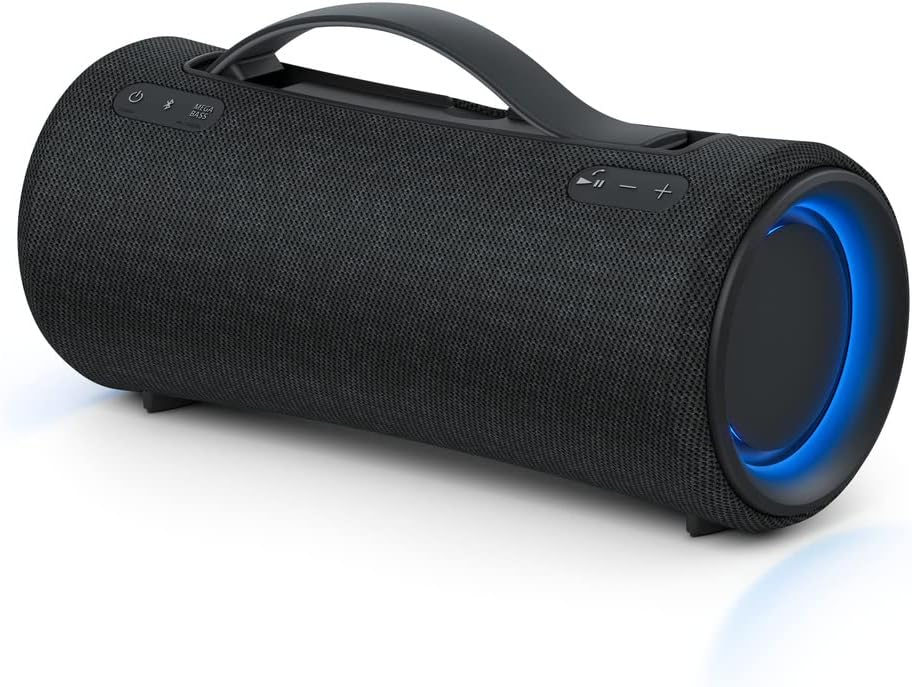

Sony SRS-XG300 X-Series Wireless Portable-Bluetooth Party-Speaker IP67 Waterproof and Dustproof with 25 Hour-Battery and Retractable Handle, Black- New

In [40]:
# Path to the input JSON file containing Sony SRS-XG300 X-Series Speaker reviews data
file_path = 'JSON_files/data_sony_xg300.json'


# Open the JSON file and load its contents into a Python dictionary
with open(file_path, 'r') as file:
    data = json.load(file)


# Initialize a list to collect structured review data
reviews_data = []
count = 0

# Iterate over each result item in the JSON data
for result in data['results']:
    # Extract the ASIN (product identifier) from the nested content
  asin = result['content']["asin"]
    # Iterate over every review associated with this result
  for review in result['content']['reviews']:
    count += 1 # Increment a counter for processed reviews (used in exception handling)
    try:
      # Build a dictionary representing a single review with selected fields
      review_info = {
      'review_id': review['id'],
      'product_id': asin,
      "title": review["title"],
      "author": review["author"],
      "rating": review["rating"],
      "content": review["content"],
      "timestamp": review["timestamp"],
      "profile_id": review["profile_id"],
      "is_verified": review["is_verified"],
      "helpful_count": review.get('helpful_count', 0),# Use 0 if not present
      "product_attributes": review["product_attributes"]
      }
      # Append the structured review to our collection
      reviews_data.append(review_info)
    except:
      # If any error occurs while processing this review, print the count
      # and stop processing further reviews for this result
      print(count)
      break

# Convert the list of review dictionaries into a pandas DataFrame
reviews_df10 = pd.DataFrame(reviews_data)

# Save the DataFrame to a CSV file for later use
reviews_df10.to_csv('CSV_files/reviews_Sony_SRS-XG300.csv', index=False)

# Display the DataFrame in the notebook environment (optional)
reviews_df10

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,R22P9TAALZTP3X,B0B43Y8GHZ,5.0 out of 5 stars Awesome speaker.,Stephen M.,5,The sound of this speaker is incredible. Good ...,"Reviewed in the United States August 29, 2024",AF7LYPOQCT7STDHZITCSNE24VFIQ,True,1,Color: BlackStyle: SRSXG300/B
1,R123BOARGUG1WM,B0B43Y8GHZ,5.0 out of 5 stars All around great speaker,A like minded person,5,I bought the bigger 500 series and thought to ...,"Reviewed in the United States August 20, 2024",AEIXT4EMUTOBCXAIK4QDHTA3VPYQ,True,2,Color: BlackStyle: SRSXG300/B
2,R1NBOJS21O8D3K,B0B43Y8GHZ,5.0 out of 5 stars Absolutely incredible battery,Rodney Molidor,5,This Sony XG500 boombox sounds good and has ab...,"Reviewed in the United States July 23, 2024",AGCI7M4EX5GHPCKJUSXWLKXVMADA,True,6,Color: BlackStyle: SRSXG500
3,R2T2U63981MT2C,B0B43Y8GHZ,4.0 out of 5 stars Sounds Great When Dialed In,Mike Blumenberg,4,"Out of the box, this speaker sounds pretty med...","Reviewed in the United States March 20, 2024",AHHXAFJW5QRATN2RFEG5TFFQHOXQ,True,11,Color: BlackStyle: SRSXG300/B
4,R178FXIZIZC5U8,B0B43Y8GHZ,5.0 out of 5 stars A speaker worthy of the Son...,Efrem Alexander,5,"This is a outstanding speaker, once you tune i...","Reviewed in the United States July 15, 2024",AEBN67HUWEPFLVQN4KCYKDGAWVRQ,True,8,Color: Light GrayStyle: SRSXG300/H
...,...,...,...,...,...,...,...,...,...,...,...
95,R1EQXVNQSI7ESF,B0B43Y8GHZ,5.0 out of 5 stars Great,yevgeniy,5,Works great has pretty good bass. batery takes...,"Reviewed in the United States December 30, 2023",AFHJFB5VPNSCMQNCMMRTT2N6T6GA,True,0,Color: BlackStyle: SRSXG300/B
96,R3MEQG3A5I1BXQ,B0B43Y8GHZ,5.0 out of 5 stars Awesomeness,rulz,5,Awesomeness,"Reviewed in the United States February 9, 2024",AFDJZ2RCAAFMRS5DCW65SUSFWFVQ,True,0,Color: BlackStyle: SRSXG300/B
97,R2514WBS66UHG,B0B43Y8GHZ,5.0 out of 5 stars Sounds incredible,Amazon Customer,5,Great bass. This speaker has rich bass at any ...,"Reviewed in the United States November 11, 2023",AECYIM6W2I54KCO67UQ52XLOUQ3A,True,0,Color: BlackStyle: SRSXG300/B
98,R3I7Z3PZKKH3J9,B0B43Y8GHZ,3.0 out of 5 stars Barely meets my satisfaction,Big Luck,3,The speaker doesn’t bump as loud as I want. Th...,"Reviewed in the United States November 16, 2023",AECQR2ZZ57XRCW7NUKOOF3QSHX6A,True,0,Color: BlackStyle: SRSXG300/B


In [41]:
# Output the number of rows (reviews) collected for SONY SRS-XG300
len(reviews_df10)

100

## 11. Tribit StormBox Blast Portable Speaker

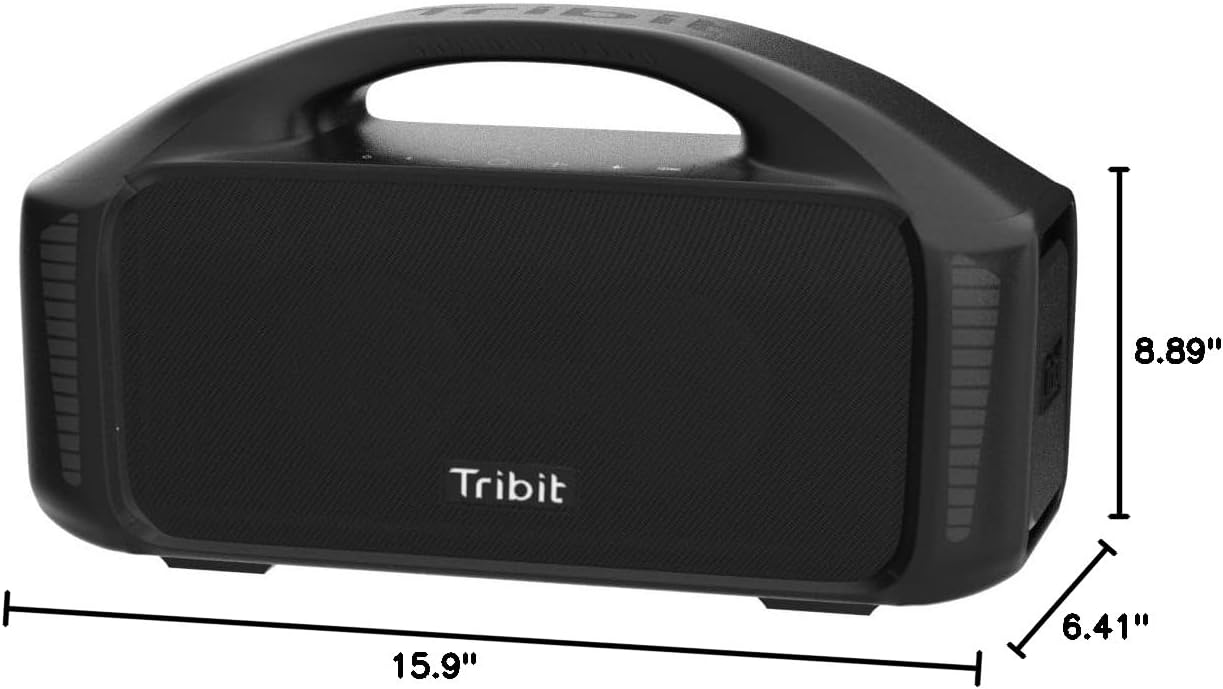

Tribit StormBox Blast Portable Speaker: 90W Loud Stereo Sound with XBass, IPX7 Waterproof Bluetooth Speaker with LED Light, Bluetooth 5.3&TWS, Custom EQ, 30H Playtime for Outdoor

In [42]:
# Path to the input JSON file containing Tribit StormBox Blast Speaker reviews data
file_path = 'JSON_files/data_tri_sto.json'


# Open the JSON file and load its contents into a Python dictionary
with open(file_path, 'r') as file:
    data = json.load(file)


# Initialize a list to collect structured review data
reviews_data = []
count = 0

# Iterate over each result item in the JSON data
for result in data['results']:
    # Extract the ASIN (product identifier) from the nested content
  asin = result['content']["asin"]
    # Iterate over every review associated with this result
  for review in result['content']['reviews']:
    count += 1 # Increment a counter for processed reviews (used in exception handling)
    try:
      # Build a dictionary representing a single review with selected fields
      review_info = {
      'review_id': review['id'],
      'product_id': asin,
      "title": review["title"],
      "author": review["author"],
      "rating": review["rating"],
      "content": review["content"],
      "timestamp": review["timestamp"],
      "profile_id": review["profile_id"],
      "is_verified": review["is_verified"],
      "helpful_count": review.get('helpful_count', 0),# Use 0 if not present
      "product_attributes": review["product_attributes"]
      }
      # Append the structured review to our collection
      reviews_data.append(review_info)
    except:
      # If any error occurs while processing this review, print the count
      # and stop processing further reviews for this result
      print(count)
      break

# Convert the list of review dictionaries into a pandas DataFrame
reviews_df11 = pd.DataFrame(reviews_data)

# Save the DataFrame to a CSV file for later use
reviews_df11.to_csv('CSV_files/reviews_Tribit_StormBox.csv', index=False)

# Display the DataFrame in the notebook environment (optional)
reviews_df11

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,RI4J0OA8QEHX8,B09PMYTJD2,5.0 out of 5 stars Simply top of its class!!,Dr. Ace Farley,5,This Stormbox blast is simply the benchmark in...,"Reviewed in the United States August 27, 2024",AELFZXV7CNAJY5QEDRPA7YXBUGDQ,True,0,
1,REPT12N1Z65B,B09PMYTJD2,5.0 out of 5 stars Tribit Stormbox Blast,BLRG,5,Arrived yesterday and connected it straight aw...,"Reviewed in the United States September 1, 2023",AF5F2GNRXCRVAOOCW36TN7IGGNWA,True,40,
2,R2D4M42M5NELUB,B09PMYTJD2,5.0 out of 5 stars Awesome Sound,Ryan Nobles-Fisher,5,"Was considering this or the JBL equivalent, bu...","Reviewed in the United States August 15, 2024",AEGRAUUKUO3JGDSH3IXQVSAXPH5A,True,2,
3,RZN1X5HHIPU79,B09PMYTJD2,5.0 out of 5 stars Unbeatable price/performanc...,Corndog,5,"Sure, it's a bit weighty, but I'd rather that ...","Reviewed in the United States January 9, 2023",AHFFS52VKVXLX27S2JJMXWFDQ5AA,True,55,
4,RWUVNJD6SC9JC,B09PMYTJD2,4.0 out of 5 stars Great initial quality,SuperBlindGirl,4,Writing this review from one blind person's pe...,"Reviewed in the United States August 27, 2024",AFIUWEUUEJPYZ2Z6F3WRP6TBHVOA,True,1,
...,...,...,...,...,...,...,...,...,...,...,...
95,R1ETA2URW8F7Z,B09PMYTJD2,5.0 out of 5 stars Good Product,Leo,5,Very good sound.,"Reviewed in the United States July 1, 2024",AENAPJJYOJ7TR4MZAJG3YFTUB56Q,True,0,
96,R327YT3BDZYU7P,B09PMYTJD2,3.0 out of 5 stars Decent product for basic use,Boxranger,3,I liked the weight and construction of the uni...,"Reviewed in the United States July 22, 2024",AFI2XHUXHAEC2UEKHBCVQFFN2ZNA,True,0,
97,R1XWYTWY3KZHT4,B09PMYTJD2,5.0 out of 5 stars Exceptionally good 🔊,T,5,This speaker is absolutely perfect. It sounds ...,"Reviewed in the United States April 8, 2024",AH76KIHCL4ZFNLMG7ERZYHEIVW5Q,True,1,
98,R1VG7FOEEHQUJJ,B09PMYTJD2,5.0 out of 5 stars 🫠,SumtingSumwhere,5,"The media could not be loaded. OMFG.Listen, yo...","Reviewed in the United States April 12, 2024",AH5RKH5FKM3D5RDTEZXJVDRZIYEQ,True,2,


In [43]:
# Output the number of rows (reviews) collected for Tribit StormBox
len(reviews_df11)

100

## 12. Ultimate Ears Boom 3 Wireless Bluetooth Speaker

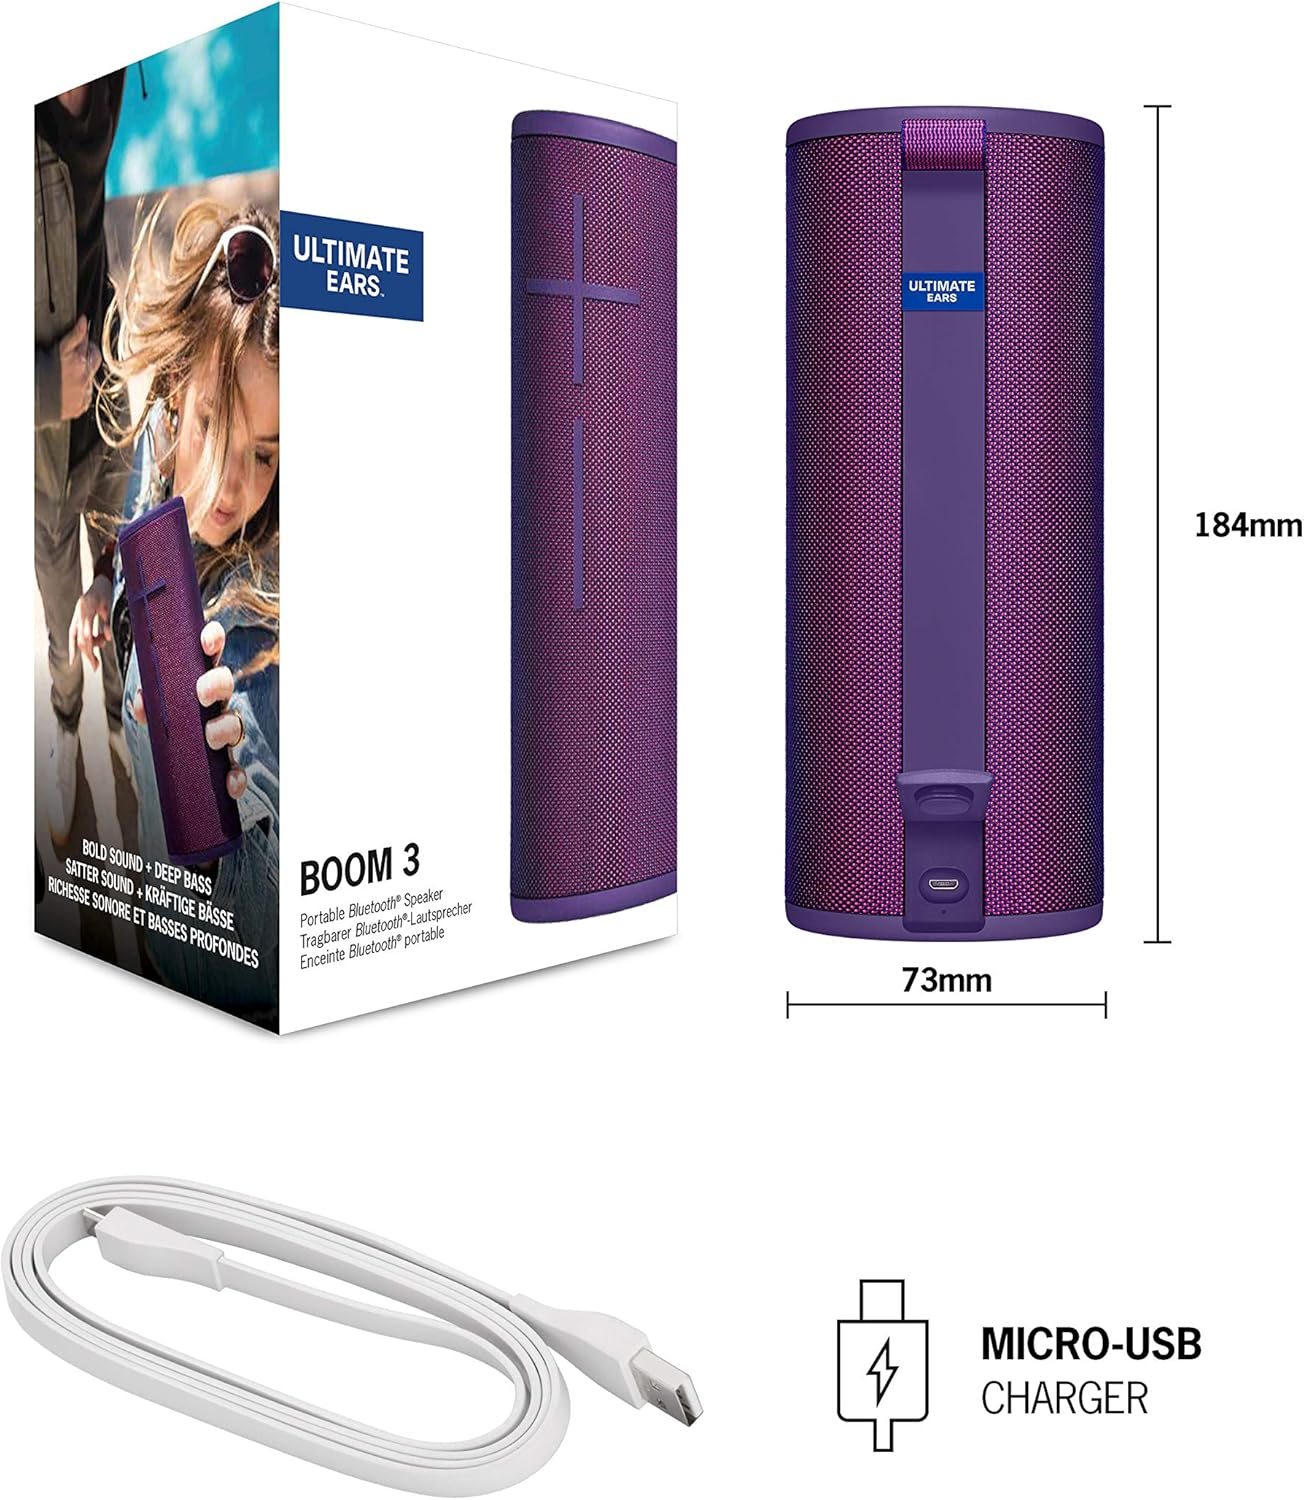

Ultimate Ears Boom 3 Wireless Bluetooth Speaker, Bold Sound + Deep Bass, Bluetooth, Magic Button, Waterproof, 15 Hours Battery, Range of 150 ft - Ultraviolet Purple

In [45]:
# Path to the input JSON file containing Ultimate Ears Boom 3 Speaker reviews data
file_path = 'JSON_files/data_ult_ear.json'


# Open the JSON file and load its contents into a Python dictionary
with open(file_path, 'r') as file:
    data = json.load(file)


# Initialize a list to collect structured review data
reviews_data = []
count = 0

# Iterate over each result item in the JSON data
for result in data['results']:
    # Extract the ASIN (product identifier) from the nested content
  asin = result['content']["asin"]
    # Iterate over every review associated with this result
  for review in result['content']['reviews']:
    count += 1 # Increment a counter for processed reviews (used in exception handling)
    try:
      # Build a dictionary representing a single review with selected fields
      review_info = {
      'review_id': review['id'],
      'product_id': asin,
      "title": review["title"],
      "author": review["author"],
      "rating": review["rating"],
      "content": review["content"],
      "timestamp": review["timestamp"],
      "profile_id": review["profile_id"],
      "is_verified": review["is_verified"],
      "helpful_count": review.get('helpful_count', 0),# Use 0 if not present
      "product_attributes": review["product_attributes"]
      }
      # Append the structured review to our collection
      reviews_data.append(review_info)
    except:
      # If any error occurs while processing this review, print the count
      # and stop processing further reviews for this result
      print(count)
      break

# Convert the list of review dictionaries into a pandas DataFrame
reviews_df12 = pd.DataFrame(reviews_data)

# Save the DataFrame to a CSV file for later use
reviews_df12.to_csv('CSV_files/reviews_Ultimate_Ears_Boom3.csv', index=False)

# Display the DataFrame in the notebook environment (optional)
reviews_df12

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,RBPSRRB4CO7OW,B07DD3WBYW,5.0 out of 5 stars great sound / greatest app ...,John,5,this is a great mobile speaker – not too big n...,"Reviewed in the United States August 11, 2024",AH6WQR3CBXOXSLPQ2ALPCEMG5T2Q,True,0,Color: Night BlackPattern: Speaker
1,R1WVYU9DT4KDFU,B07DD3WBYW,5.0 out of 5 stars Small but Mighty: Ultimate ...,Kathleen,5,The Ultimate Ears BOOM 3 Wireless Bluetooth Sp...,"Reviewed in the United States July 26, 2024",AHP3MWGHFNQNNNAOQEZKYORO6CXA,True,1,Color: Night BlackPattern: Speaker
2,R2ZSP7ZGA8LW3D,B07DD3WBYW,5.0 out of 5 stars Great sound!,BJ A.,5,I was curiously cautious about the sound this ...,"Reviewed in the United States August 6, 2024",AE3FOFY7H357C6RMK3TANIOXYTEA,True,0,Color: Night BlackPattern: Speaker
3,R1OGZ820CCA09F,B07DD3WBYW,5.0 out of 5 stars Sound great!,Ken S.,5,I have four of these. I have trouble syncing a...,"Reviewed in the United States August 30, 2024",AENEAGOB6XQHK44BBOOB25HQEFEA,True,0,Color: Night BlackPattern: Speaker
4,R1I3Q77XS8GRO6,B07DD3WBYW,4.0 out of 5 stars UE Boom makes a great speaker,Neil Dejewski,4,Sounds great! Waterproof and drop proof. Two t...,"Reviewed in the United States September 6, 2024",AFL3JJSIAFGNWEKZEAUYCTS6Z4SA,True,0,Color: Lagoon BluePattern: Speaker
...,...,...,...,...,...,...,...,...,...,...,...
95,R2GI0V9SVJPRQ3,B07DD3WBYW,"2.0 out of 5 stars Sounds is muddy, micro-USB",Walter W,2,The micro-usb port caught me off guard. I trie...,"Reviewed in the United States May 25, 2024",AHA4BS73C3MSQ3Y5NAFUCKMD4SGQ,True,0,Color: Lagoon BluePattern: Speaker
96,R2MLWKC3JFNFDX,B07DD3WBYW,5.0 out of 5 stars Good soeaker,Ana,5,My husband loves it! It is portable and very g...,"Reviewed in the United States February 28, 2024",AGS455DZKBQHYHYTH2NPU5YUXHAQ,True,0,Color: Night BlackPattern: Speaker
97,RJEXLAFIRWWRD,B07DD3WBYW,5.0 out of 5 stars Idiot proof and a great sound,Cindy,5,1. Great sounds.2. Designed for fools (like me...,"Reviewed in the United States November 25, 2023",AHHDFD2FOO7PYT6THV26ARUOB3GA,True,3,Color: Ultraviolet PurplePattern: Speaker
98,R40NGCH3W5BSQ,B07DD3WBYW,"3.0 out of 5 stars Nice little speaker, but mi...",Noah Libby-Haines,3,This is a great travel speaker with one big fl...,"Reviewed in the United States January 4, 2024",AGQNTSI7GAPRHSXT6OA6WGWV2IRA,True,1,Color: Night BlackPattern: Speaker


In [46]:
# Output the number of rows (reviews) collected for Ultimate Ears Boom 3
len(reviews_df12)

100

In [47]:
# Read multiple CSV files containing reviews for the 12 various products
df_1 = pd.read_csv('CSV_files/reviews_Beats_Pill.csv')
df_2 = pd.read_csv('CSV_files/reviews_Altec_Lansing.csv')
df_3 = pd.read_csv('CSV_files/reviews_Ankar_Soundcore.csv')
df_4 = pd.read_csv('CSV_files/reviews_Bang&Olufsen_Beosound.csv')
df_5 = pd.read_csv('CSV_files/reviews_Bose_SoundLink_Flex.csv')
df_6 = pd.read_csv('CSV_files/reviews_Doss_SoundBox_Ultra.csv')
df_7 = pd.read_csv('CSV_files/reviews_JBL_Charge5.csv')
df_8 = pd.read_csv('CSV_files/reviews_Marshall_Emberton2.csv')
df_9 = pd.read_csv('CSV_files/reviews_Sony_SRS-XB33.csv')
df_10 = pd.read_csv('CSV_files/reviews_Sony_SRS-XG300.csv')
df_11 = pd.read_csv('CSV_files/reviews_Tribit_StormBox.csv')
df_12 = pd.read_csv('CSV_files/reviews_Ultimate_Ears_Boom3.csv')

In [49]:
# Combine all individual product review dataframes into a single merged dataframe
merged_df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12], ignore_index=True)

# Display the length of the merged dataframe (optional)
len(merged_df)

1080

In [50]:
# Save the merged reviews to a CSV file for further Exploratory Data Analysis
merged_df.to_csv('merged_reviews_data.csv', index=False)
